# CẤU TRÚC BÀI LÀM
<u>Nội dung</u>:
* Quan sát dữ liệu
* Tiền xử lý dữ liệu
* EDAs
* Machine Learning


#**I. Quan sát dữ liệu**

## Tải thư viện cần thiết

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import platform
import gdown
import geopandas as gpd
from shapely.geometry import Point, Polygon
from IPython.display import display, HTML
import warnings
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

##Quan sát dữ liệu

In [ ]:
#Tải dataset
!gdown 11HdZNve-_QShEXhso6IdYN2rVCrLJ4ES

Downloading...
From: https://drive.google.com/uc?id=11HdZNve-_QShEXhso6IdYN2rVCrLJ4ES
To: /content/2015_Street_Tree_Census_-_Tree_Data_20231015.csv
100% 228M/228M [00:04<00:00, 45.9MB/s]


In [ ]:
#Quan sát dữ liệu
tree_df = pd.read_csv(r'/content/2015_Street_Tree_Census_-_Tree_Data_20231015.csv', sep=',', encoding='utf-8')
pd.set_option('display.max_columns', None)
tree_df

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,"4,073,900",New York,40.723092,-73.844215,"1,027,431.148","202,756.7687",29.0,739,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,"4,097,300",New York,40.794111,-73.818679,"1,034,455.701","228,644.8374",19.0,973,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,"3,044,900",New York,40.717581,-73.936608,"1,001,822.831","200,716.8913",34.0,449,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,"3,044,900",New York,40.713537,-73.934456,"1,002,420.358","199,244.2531",34.0,449,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,"3,016,500",New York,40.666778,-73.975979,"990,913.775","182,202.426",39.0,165,3025654.0,3.010850e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,217978,08/18/2015,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,32 MARCY AVENUE,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,"3,051,900",New York,40.713211,-73.954944,"996,740.686","199,121.6363",34.0,519,3062513.0,3.023690e+09
683784,183795,348185,08/29/2015,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,67-035 SELFRIDGE STREET,11375,Forest Hills,406,4,Queens,29,28,15,QN17,Forest Hills,"4,070,700",New York,40.715194,-73.856650,"1,023,989.074","199,873.6475",29.0,707,4075448.0,4.031810e+09
683785,166161,401670,08/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,130 BIDWELL AVENUE,10314,Staten Island,501,5,Staten Island,50,63,24,SI07,Westerleigh,"5,020,100",New York,40.620762,-74.136517,"946,351.4104","165,466.0763",50.0,201,5011657.0,5.004080e+09
683786,184028,504204,08/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,1985 ANTHONY AVENUE,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,"2,023,502",New York,40.850828,-73.903115,"1,011,053.646","249,271.9507",15.0,"23,502",2007757.0,2.028120e+09


In [ ]:
# Quan sát các cột
# Kích thước dữ liệu sau khi đọc
print(tree_df.shape)
# Thông tin về các cột dữ liệu
print(tree_df.info())

(683788, 45)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            652172 non-null  object 
 8   spc_latin         652169 non-null  object 
 9   spc_common        652169 non-null  object 
 10  steward           652173 non-null  object 
 11  guards            652172 non-null  object 
 12  sidewalk          652172 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          652124 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_gr

In [ ]:
# Thông số thống kê của dữ liệu
tree_df.describe()

,tree_id,block_id,tree_dbh,stump_diam,postcode,community board,borocode,cncldist,st_assem,st_senate,latitude,longitude,council district,bin,bbl
count,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,677269.000000,6.742290e+05,6.742290e+05
mean,365205.011085,313793.096236,11.279787,0.432463,10916.246044,343.505404,3.358500,29.943181,50.791583,20.615781,40.701261,-73.924060,30.027330,3.495439e+06,3.413414e+09
std,208122.092902,114839.024312,8.723042,3.290241,651.553364,115.740601,1.166746,14.328531,18.966520,7.390844,0.090311,0.123583,14.301717,1.193275e+06,1.174892e+09
min,3.000000,100002.000000,0.000000,0.000000,83.000000,101.000000,1.000000,1.000000,23.000000,10.000000,40.498466,-74.254965,1.000000,1.000000e+06,0.000000e+00
25%,186582.750000,221556.000000,4.000000,0.000000,10451.000000,302.000000,3.000000,19.000000,33.000000,14.000000,40.631928,-73.980500,19.000000,3.031991e+06,3.011240e+09
50%,366214.500000,319967.000000,9.000000,0.000000,11214.000000,402.000000,4.000000,30.000000,52.000000,21.000000,40.700612,-73.912911,30.000000,4.020352e+06,4.008560e+09
75%,546170.250000,404624.000000,16.000000,0.000000,11365.000000,412.000000,4.000000,43.000000,64.000000,25.000000,40.762228,-73.834910,43.000000,4.263123e+06,4.105700e+09
max,722694.000000,999999.000000,450.000000,140.000000,11697.000000,503.000000,5.000000,51.000000,87.000000,36.000000,40.912918,-73.700488,51.000000,5.515124e+06,5.080500e+09


#**II. Tiền xử lý dữ liệu**

## Lọc thuộc tính cần sử dụng

In [ ]:
tree = tree_df[['tree_id', 'spc_common', 'tree_dbh', 'stump_diam', 'curb_loc', 'status', 'health', 'steward', 'sidewalk', 'problems', 'root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other', 'user_type', 'address', 'zip_city', 'borough', 'nta_name', 'latitude', 'longitude', 'postcode', 'community board', 'guards', 'cncldist']]
tree

,tree_id,spc_common,tree_dbh,stump_diam,curb_loc,status,health,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,user_type,address,zip_city,borough,nta_name,latitude,longitude,postcode,community board,guards,cncldist
0,180683,red maple,3,0,OnCurb,Alive,Fair,None,NoDamage,None,No,No,No,No,No,No,No,No,No,TreesCount Staff,108-005 70 AVENUE,Forest Hills,Queens,Forest Hills,40.723092,-73.844215,11375,406,None,29
1,200540,pin oak,21,0,OnCurb,Alive,Fair,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,TreesCount Staff,147-074 7 AVENUE,Whitestone,Queens,Whitestone,40.794111,-73.818679,11357,407,None,19
2,204026,honeylocust,3,0,OnCurb,Alive,Good,1or2,Damage,None,No,No,No,No,No,No,No,No,No,Volunteer,390 MORGAN AVENUE,Brooklyn,Brooklyn,East Williamsburg,40.717581,-73.936608,11211,301,None,34
3,204337,honeylocust,10,0,OnCurb,Alive,Good,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Volunteer,1027 GRAND STREET,Brooklyn,Brooklyn,East Williamsburg,40.713537,-73.934456,11211,301,None,34
4,189565,American linden,21,0,OnCurb,Alive,Good,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Volunteer,603 6 STREET,Brooklyn,Brooklyn,Park Slope-Gowanus,40.666778,-73.975979,11215,306,None,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,pin oak,25,0,OnCurb,Alive,Good,None,Damage,None,No,No,No,No,No,No,No,No,No,Volunteer,32 MARCY AVENUE,Brooklyn,Brooklyn,North Side-South Side,40.713211,-73.954944,11211,301,None,34
683784,183795,Kentucky yellowwood,7,0,OnCurb,Alive,Good,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No,Volunteer,67-035 SELFRIDGE STREET,Forest Hills,Queens,Forest Hills,40.715194,-73.856650,11375,406,None,29
683785,166161,red maple,12,0,OnCurb,Alive,Good,None,Damage,None,No,No,No,No,No,No,No,No,No,Volunteer,130 BIDWELL AVENUE,Staten Island,Staten Island,Westerleigh,40.620762,-74.136517,10314,501,None,50
683786,184028,red maple,9,0,OnCurb,Alive,Good,None,NoDamage,None,No,No,No,No,No,No,No,No,No,TreesCount Staff,1985 ANTHONY AVENUE,Bronx,Bronx,Mount Hope,40.850828,-73.903115,10457,205,None,15


In [ ]:
# Quan sát biến phân loại, biến số
categorical = []
numeric = []
for i in range(tree.shape[1]):
    if tree.iloc[:, i].dtypes == 'int64' or tree.iloc[:, i].dtypes == 'float64':
        if tree.columns[i] not in ['tree_id', 'postcode', 'community board']:
            if tree.iloc[:, i].nunique() > 10:
                numeric.append(tree.columns[i])
            else:
                categorical.append(tree.columns[i])
        else:
            categorical.append(tree.columns[i])
    else:
        cleaned_data = tree.iloc[:, i].astype(str).str.replace(",", "").str.replace(".", "")
        try:
            numeric_values = pd.to_numeric(cleaned_data, errors='raise')
            if numeric_values.nunique() > 10:
                numeric.append(tree.columns[i])
        except ValueError:
            categorical.append(tree.columns[i])
print('\nCác biến phân loại của dataset bao gồm:')
print(categorical)
print('\nCác biến số của dataset bao gồm:')
print(numeric)

#Hiển thị các cột chứa dữ liệu null
null_dict = {}
for i in range(0,tree.shape[1]):
  if  tree.iloc[:,i].isnull().sum() > 0:
    null_dict[tree.columns[i]] = tree.iloc[:,i].isnull().sum()
print('\n\nCác cột có chứa dữ liệu null bao gồm:')
for key,value in null_dict.items():
  for i, (k,v) in enumerate(null_dict.items()):
    if i ==(len(null_dict) -1):
      print(k,end='.')
    else:
      print(k,end=', ')
  break

<ipython-input-126-3ff0b291585a>:14: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.




Các biến phân loại của dataset bao gồm:
['tree_id', 'spc_common', 'curb_loc', 'status', 'health', 'steward', 'sidewalk', 'problems', 'root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other', 'user_type', 'address', 'zip_city', 'borough', 'nta_name', 'postcode', 'community board', 'guards']

Các biến số của dataset bao gồm:
['tree_dbh', 'stump_diam', 'latitude', 'longitude', 'cncldist']


Các cột có chứa dữ liệu null bao gồm:
spc_common, health, steward, sidewalk, problems, guards.

##Xử lý dữ liệu bị thiếu

In [ ]:
# Quan sát dữ liệu bị thiếu ở các cột
# 6 cột spc_common, health, steward, sidewalk, problems, guards có missing values
tree.isna().sum()


tree_id                0
spc_common         31619
tree_dbh               0
stump_diam             0
curb_loc               0
status                 0
health             31616
steward            31615
sidewalk           31616
problems           31664
root_stone             0
root_grate             0
root_other             0
trunk_wire             0
trnk_light             0
trnk_other             0
brch_light             0
brch_shoe              0
brch_other             0
user_type              0
address                0
zip_city               0
borough                0
nta_name               0
latitude               0
longitude              0
postcode               0
community board        0
guards             31616
cncldist               0
dtype: int64

In [ ]:
# Thống kê missing values ở các cột có chứa missing values
missing_df = pd.DataFrame(list(null_dict.items()),columns=['Biến','Giá trị bị thiếu'])
missing_df['% Giá trị bị thiếu'] = missing_df['Giá trị bị thiếu']/tree.shape[0]
missing_df.index = missing_df.index + 1
print(missing_df)

         Biến  Giá trị bị thiếu  % Giá trị bị thiếu
1  spc_common             31619            0.046241
2      health             31616            0.046237
3     steward             31615            0.046235
4    sidewalk             31616            0.046237
5    problems             31664            0.046307
6      guards             31616            0.046237


In [ ]:
# Các loài cây có trạng thái là 'Dead' hoặc 'Stump' thì không được ghi nhận các thông tin tại các cột
# 'spc_common', 'health', 'steward', 'sidewalk', 'problems'. Đây là nguyên nhân dẫn đến missing values tại các cột này.
# Thay thế các cột có dòng bị missing do mang trạng thái là 'Dead' hoặc 'Stump' thành 'Not recorded'
tree.loc[(tree['status'] == "Dead") | (tree['status'] == "Stump"), ['spc_common', 'health', 'steward', 'sidewalk', 'problems']] = 'Not Recorded'

In [ ]:
# Với giá trị NaN tại biến guards, ta thay thế bằng giá trị phổ biến nhất, ở đây là None
tree['guards'].fillna('None', inplace=True)

In [ ]:
# Kiểm tra lại xem biến health đã được loại bỏ hết các giá trị missing chưa
# Phát hiện cây có id 245041 còn sống (alive) nhưng không có giá trị health
tree[tree['health'].isna()]

,tree_id,spc_common,tree_dbh,stump_diam,curb_loc,status,health,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,user_type,address,zip_city,borough,nta_name,latitude,longitude,postcode,community board,guards,cncldist
32889,245041,green ash,16,0,OnCurb,Alive,NaN,None,Damage,None,No,No,No,No,No,No,No,No,No,TreesCount Staff,84 LUCILLE AVENUE,Staten Island,Staten Island,Rossville-Woodrow,40.548597,-74.216412,10309,503,None,51


In [ ]:
#Giá trị good là giá trị phổ biến nhất, ta cũng thấy cây không có vấn đề (problems = "None") --> cho giá trị health của cây này thành "Good"
tree['health'].value_counts()

Good            528850
Fair             96504
Not Recorded     31615
Poor             26818
Name: health, dtype: int64

In [ ]:
tree['health'].fillna('Good', inplace = True)

In [ ]:
# Viết hoa các chữ trong tên cây
tree['spc_common'] = tree['spc_common'].str.title()
tree['spc_common'].value_counts()

London Planetree    87014
Honeylocust         64263
Callery Pear        58931
Pin Oak             53185
Norway Maple        34189
                    ...  
Black Pine             37
Pitch Pine             33
Osage-Orange           29
Scots Pine             25
Virginia Pine          10
Name: spc_common, Length: 133, dtype: int64

In [ ]:
# Quan sát các giá trị của biến sidewalk
tree['sidewalk'].value_counts()

NoDamage        464978
Damage          187194
Not Recorded     31615
Name: sidewalk, dtype: int64

In [ ]:
# Quan sát các giá trị của biến problems
tree['problems'].value_counts()

None                                                                          426280
Stones                                                                         95673
Not Recorded                                                                   31615
BranchLights                                                                   29452
Stones,BranchLights                                                            17808
                                                                               ...  
Stones,RootOther,WiresRope,TrunkLights,TrunkOther,BranchLights,BranchOther         1
Stones,MetalGrates,TrunkLights,TrunkOther                                          1
MetalGrates,RootOther,TrunkLights,BranchLights                                     1
WiresRope,TrunkOther,BranchLights,Sneakers                                         1
MetalGrates,TrunkOther,Sneakers                                                    1
Name: problems, Length: 233, dtype: int64

In [ ]:
# Kiểm tra xem còn bao nhiêu missing values cần được xử lý
tree.isna().sum()

tree_id             0
spc_common          5
tree_dbh            0
stump_diam          0
curb_loc            0
status              0
health              0
steward             0
sidewalk            1
problems           49
root_stone          0
root_grate          0
root_other          0
trunk_wire          0
trnk_light          0
trnk_other          0
brch_light          0
brch_shoe           0
brch_other          0
user_type           0
address             0
zip_city            0
borough             0
nta_name            0
latitude            0
longitude           0
postcode            0
community board     0
guards              0
cncldist            0
dtype: int64

In [ ]:
#Thay missing values cho problems và sidewalk là giá trị phổ biến nhất, còn spc_common thì để Unknown (coi như không biết tên của cây)

# thay 49 giá trị trong problems = "None"
tree['problems'].fillna('None', inplace = True)

# thay 1 giá trị trong sidewalk = "NoDamage"
tree['sidewalk'].fillna('NoDamage', inplace = True)

# thay 5 giá trị trong spc_common = "Unknown"
tree['spc_common'].fillna('Unknown', inplace = True)

In [ ]:
# Kiểm tra lại các giá trị missing ở các cột sau xử lý
tree.isna().sum()

tree_id            0
spc_common         0
tree_dbh           0
stump_diam         0
curb_loc           0
status             0
health             0
steward            0
sidewalk           0
problems           0
root_stone         0
root_grate         0
root_other         0
trunk_wire         0
trnk_light         0
trnk_other         0
brch_light         0
brch_shoe          0
brch_other         0
user_type          0
address            0
zip_city           0
borough            0
nta_name           0
latitude           0
longitude          0
postcode           0
community board    0
guards             0
cncldist           0
dtype: int64

##Xử lý Outliers

###Biến tree_dbh

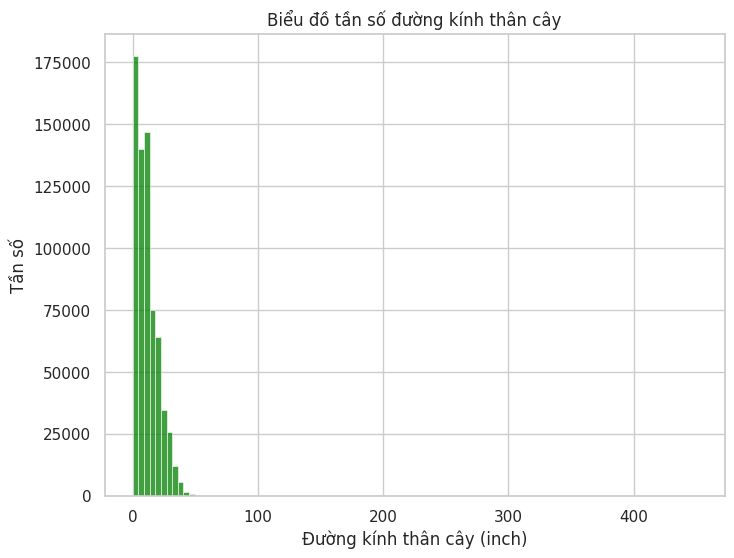

In [ ]:
# Trực quan hóa bằng biểu đồ histogram để quan sát phân phối của biến
sns.set(style = "whitegrid")

plt.figure(figsize=(8,6))
sns.histplot(x=tree['tree_dbh'], bins = 100, color='green')

plt.xlabel('Đường kính thân cây (inch)')
plt.ylabel('Tần số')
plt.title('Biểu đồ tần số đường kính thân cây')

plt.show()

In [ ]:
# Tính median va median absolute deviation (MAD)
median = tree['tree_dbh'].median()
mad = np.median(np.abs(tree['tree_dbh'] - median))

In [ ]:
# Tính modified z score
tree['modified_z_score'] = 0.6745 * (tree['tree_dbh'] - median) / mad

In [ ]:
# Đặt threshold ở mức 3.5 và loại bỏ outlier
threshold = 3.5
outliers = tree[np.abs(tree['modified_z_score']) > threshold]
tree = tree[np.abs(tree['modified_z_score']) <= threshold]

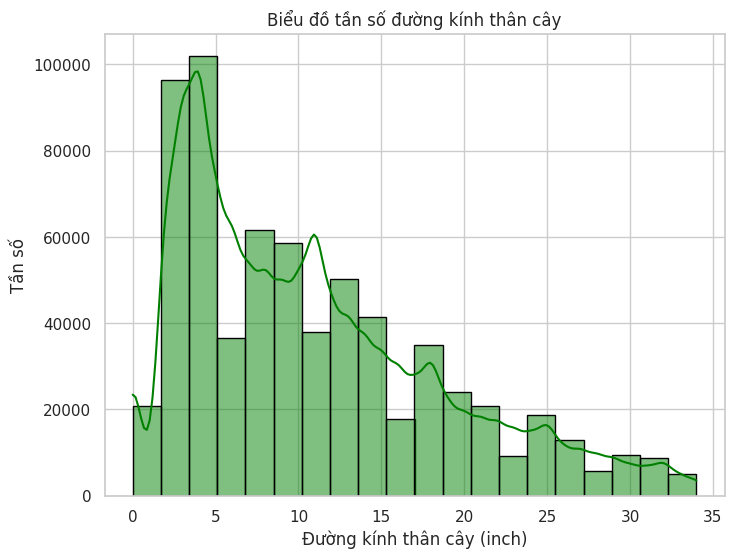

In [ ]:
# Trực quan hóa bằng biểu đồ tần số sau khi xử lý outliers

sns.set(style = "whitegrid")

plt.figure(figsize=(8,6))

sns.histplot(x=tree['tree_dbh'], bins=20, kde=True, edgecolor='black', color='green')

plt.xlabel('Đường kính thân cây (inch)')
plt.ylabel('Tần số')
plt.title('Biểu đồ tần số đường kính thân cây')

plt.show()

# **III. Exploratory Data Analysis (EDA)**

##1. Tìm hiểu thông tin về cây cối tại cấp độ thành phố

###1.1 Thông tin về mật độ và các biện pháp bảo vệ cây cối tại thành phố  New York


####*Thống kê top 10 giống cây phổ biến và ít phổ biến tại New York*

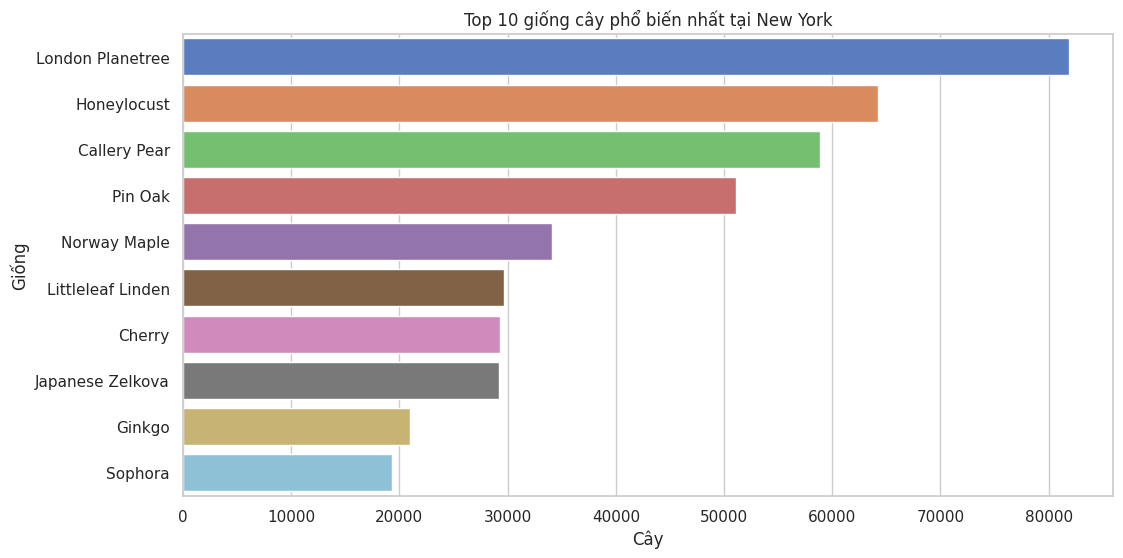

In [ ]:
# Lấy ra 10 giống cây phổ biến nhất, không lấy giá trị "Not Recorded"
top10_species = tree[tree['spc_common'] != 'Not Recorded']['spc_common'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top10_species.values, y=top10_species.index, palette='muted')

plt.title('Top 10 giống cây phổ biến nhất tại New York')
plt.xlabel('Cây')
plt.ylabel('Giống')
plt.show()

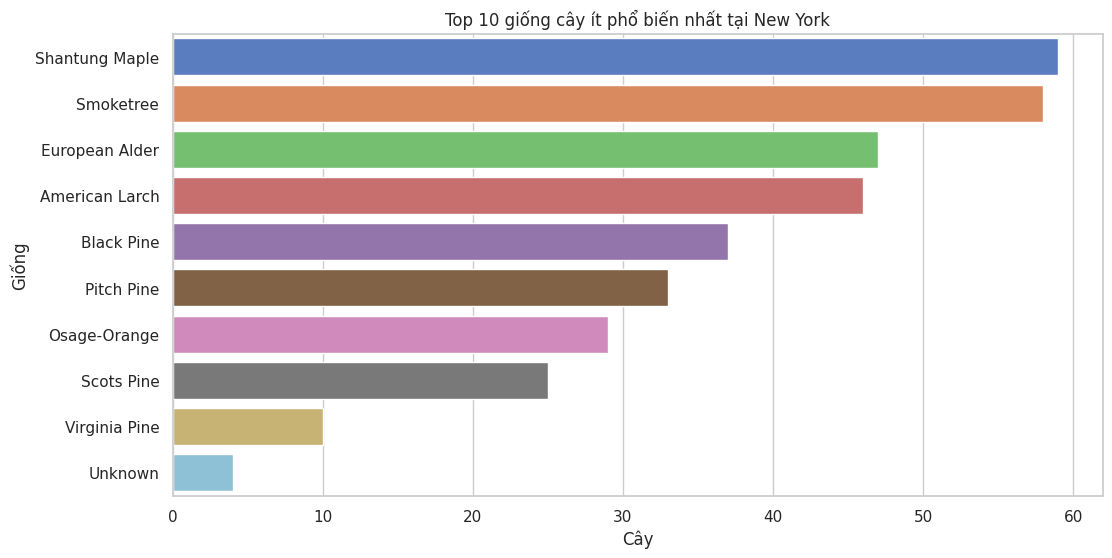

In [ ]:
# Lấy ra 10 giống cây ít phổ biến nhất, không lấy giá trị "Not Recorded"
bottom10_species = tree[tree['spc_common'] != 'Not Recorded']['spc_common'].value_counts().tail(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=bottom10_species.values, y=bottom10_species.index, palette='muted')

plt.title('Top 10 giống cây ít phổ biến nhất tại New York')
plt.xlabel('Cây')
plt.ylabel('Giống')
plt.show()

In [ ]:
# Tính tỷ lệ giống cây
species_counts = tree.spc_common.value_counts(normalize=True).reset_index()
species_counts.columns = ["Giống", "Tỷ lệ"]
species_counts['Tỷ lệ'] = species_counts['Tỷ lệ'] * 100
top_species = species_counts[species_counts['Giống'] != 'Not Recorded'][:10]
top_species.reset_index(inplace=True, drop=True)
top_species

,Giống,Tỷ lệ
0,London Planetree,12.152837
1,Honeylocust,9.534393
2,Callery Pear,8.745267
3,Pin Oak,7.592980
4,Norway Maple,5.062284
5,Littleleaf Linden,4.402922
6,Cherry,4.344870
7,Japanese Zelkova,4.341009
8,Ginkgo,3.118347
9,Sophora,2.868766


In [ ]:
print("Có {} giống cây khác nhau trên đường phố New York.".format(len(species_counts)))

print("\nTop {} giống cây phổ biến nhất chiếm {}% tổng số cây trong New York.\n{} giống còn lại chiếm {}% tổng số cây.\n".format(
    len(top_species),
    round(top_species['Tỷ lệ'].sum(), 2),
    len(species_counts) - len(top_species),
    round(species_counts[len(top_species):]['Tỷ lệ'].sum(), 2)
))

print("Nhìn chung, giống cây phổ biến nhất là {}.\nCó tới {}% cây thuộc giống này.".format(
        species_counts['Giống'][0],
        round(species_counts['Tỷ lệ'][0], 2),
        species_counts['Tỷ lệ'][0]
    ))
print("\nVề 9 giống phổ biến còn lại: ")
for i in range(1,10):
    print("{}% cây là {}".format(
        round(top_species['Tỷ lệ'][i], 1),
        top_species['Giống'][i]
    ))

Có 134 giống cây khác nhau trên đường phố New York.

Top 10 giống cây phổ biến nhất chiếm 62.16% tổng số cây trong New York.
124 giống còn lại chiếm 36.01% tổng số cây.

Nhìn chung, giống cây phổ biến nhất là London Planetree.
Có tới 12.15% cây thuộc giống này.

Về 9 giống phổ biến còn lại: 
9.5% cây là Honeylocust
8.7% cây là Callery Pear
7.6% cây là Pin Oak
5.1% cây là Norway Maple
4.4% cây là Littleleaf Linden
4.3% cây là Cherry
4.3% cây là Japanese Zelkova
3.1% cây là Ginkgo
2.9% cây là Sophora


####*Thống kê về số lượng biện pháp bảo vệ cây được áp dụng tại địa bàn thành phố New York*

In [ ]:
steward = tree['steward'].value_counts()
steward_df = steward.reset_index().rename(columns={'index':'Steward','steward':'Count'})
steward_df.index = steward_df.index + 1
html_text = "<p style='text-align: left center; color: #438c7c; font-size: 20px; font-weight: bold; font-family: Arial;'>Số lượng biện pháp bảo vệ cây được áp dụng tại địa bàn thành phố New York</p>"
display(HTML(html_text))
steward_df

,Steward,Count
1,None,478496
2,1or2,142736
3,Not Recorded,31594
4,3or4,19103
5,4orMore,1601


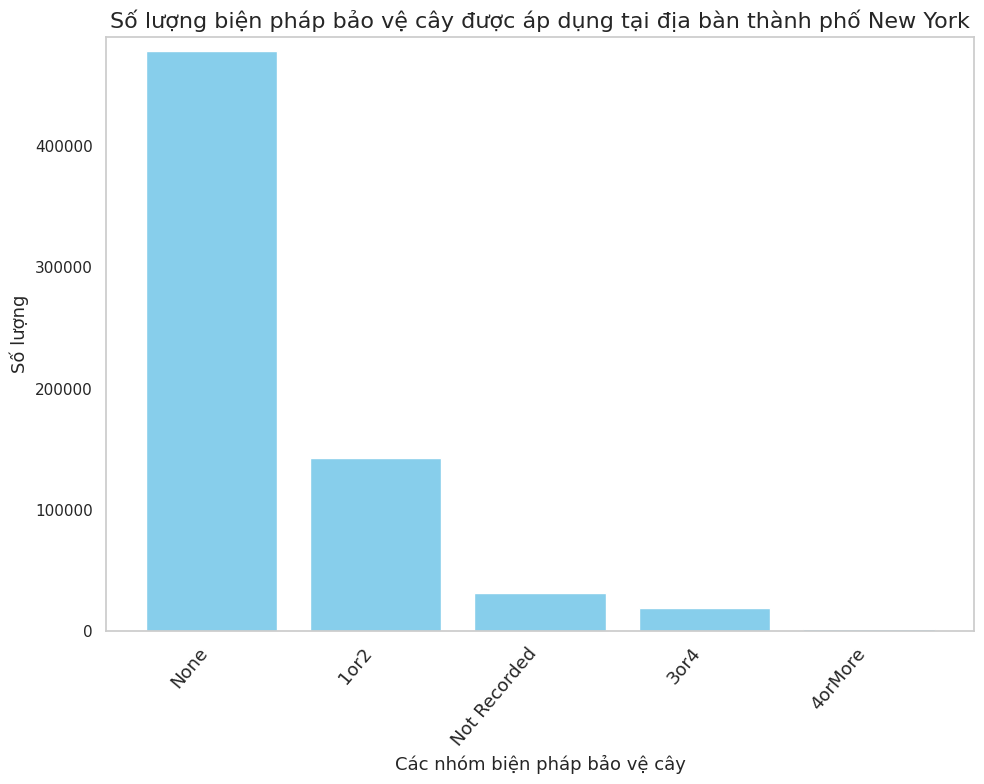

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(steward_df['Steward'], steward_df['Count'], color='skyblue')
plt.xlabel('Các nhóm biện pháp bảo vệ cây',fontsize=13)
plt.ylabel('Số lượng',fontsize=13)
plt.title('Số lượng biện pháp bảo vệ cây được áp dụng tại địa bàn thành phố New York',fontsize=16)
plt.xticks(rotation=50, ha='right',fontsize=13)
plt.ylim(0,490000)
plt.tight_layout()
plt.grid(False)
plt.show()

####*Đánh giá mức độ hiệu quả của các hàng rào bảo vệ cây tại thành phố New York*

In [ ]:
guard = tree['guards'].value_counts()
guard_df = guard.reset_index().rename(columns={'index':'Guards','guards':'Count'})
guard_df.index =guard_df.index + 1
html_text = "<p style='text-align: left center; color: #438c7c; font-size: 20px; font-weight: bold; font-family: Arial;'>Đánh giá mức độ hiệu quả của các hàng rào bảo vệ cây tại thành phố New York</p>"
display(HTML(html_text))
guard_df

,Guards,Count
1,None,593982
2,Helpful,51675
3,Harmful,20186
4,Unsure,7687


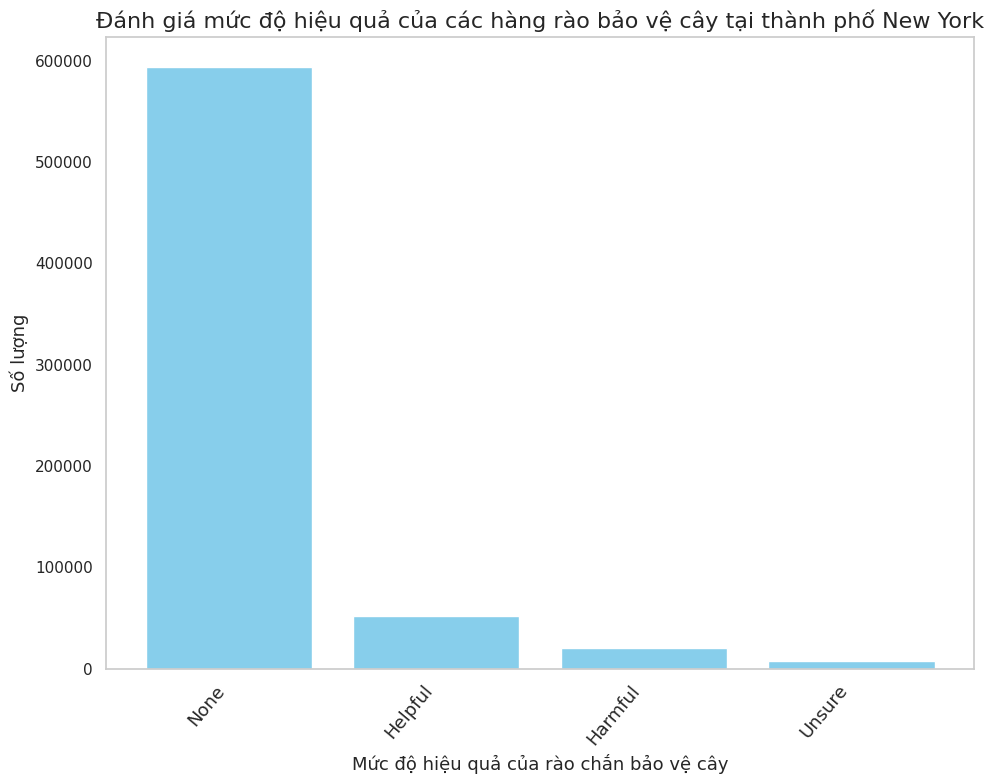

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(guard_df['Guards'], guard_df['Count'], color='skyblue')
plt.xlabel('Mức độ hiệu quả của rào chắn bảo vệ cây',fontsize=13)
plt.ylabel('Số lượng',fontsize=13)
plt.title('Đánh giá mức độ hiệu quả của các hàng rào bảo vệ cây tại thành phố New York',fontsize=16)
plt.xticks(rotation=50, ha='right',fontsize=13)
plt.tight_layout()
plt.grid(False)
plt.show()

###1.2. Thông tin về trạng thái, sức khỏe của cây tại thành phố New York

####*Trạng thái của cây*

In [ ]:
# Thống kê về trạng thái của cây. Sử dụng biến 'status'
status = tree['status'].value_counts()
status_df = status.reset_index().rename(columns={'index':'Status','status':'Count'})
status_df['Percentage'] = round((status_df['Count']/status_df['Count'].sum())*100,2)
status_df.index = status_df.index + 1
html_text = "<p style='text-align: left; color: #438c7c; font-size: 20px; font-weight: bold; font-family: Arial;'>Trạng thái của cây</p>"
display(HTML(html_text))
status_df

,Status,Count,Percentage
1,Alive,641936,95.31
2,Stump,17654,2.62
3,Dead,13940,2.07


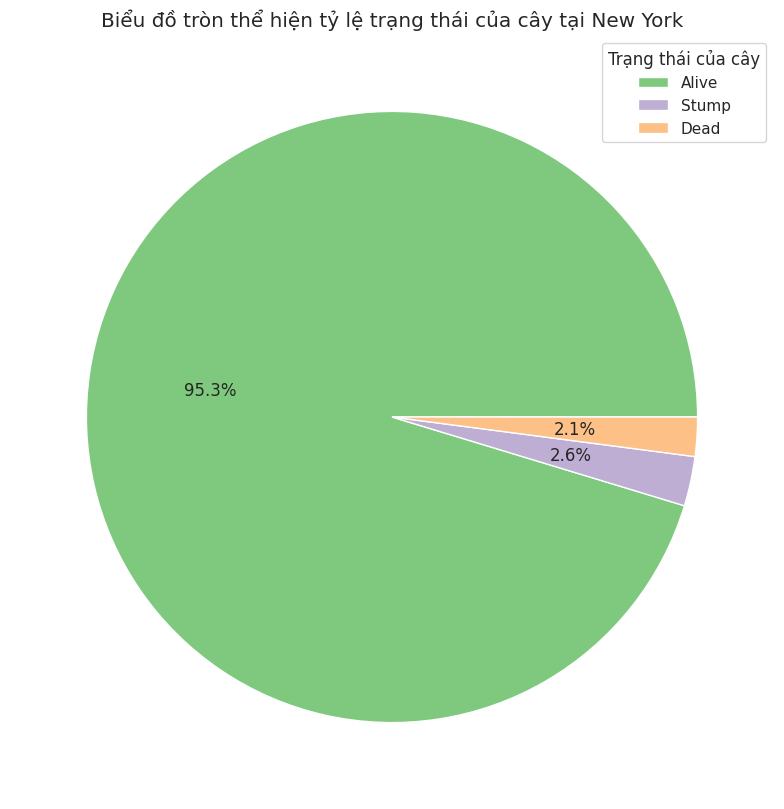

In [ ]:
# Trực quan về trạng thái của cây. Sử dụng biến 'status'
plt.figure(figsize=(8,10))
percentage = status_df['Percentage']
labels = status_df['Status']
colors = plt.cm.Accent.colors
patches, texts, autotexts = plt.pie(percentage, autopct='%1.1f%%', colors=colors)
plt.title('Biểu đồ tròn thể hiện tỷ lệ trạng thái của cây tại New York',fontsize='large')
legend = plt.legend(patches, labels, loc='best')
legend.set_title('Trạng thái của cây')
plt.tight_layout()
plt.show()

####*Sức khỏe của cây*

In [ ]:
# Thống kê về tình trạng sức khỏe của cây. Sử dụng biến 'Health'
health_status = tree['health'].value_counts()
health_df = health_status.reset_index().rename(columns={'index':'Health','health':'Count'})
health_df['Percentage'] = round((health_df['Count']/health_df['Count'].sum())*100,2)
health_df.index = health_df.index + 1
html_text = "<p style='text-align: left center; color: #438c7c; font-size: 20px; font-weight: bold; font-family: Arial;'>Tình trạng sức khỏe của cây</p>"
display(HTML(html_text))
health_df

,Health,Count,Percentage
1,Good,519635,77.15
2,Fair,95632,14.20
3,Not Recorded,31594,4.69
4,Poor,26669,3.96


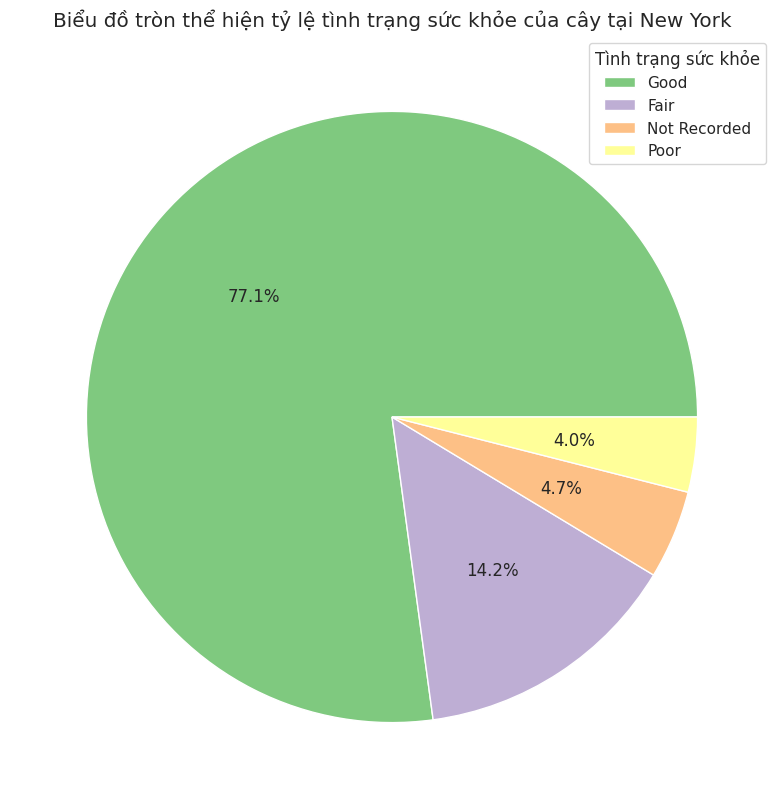

In [ ]:
# Trực quan về tình trạng sức khỏe của cây. Sử dụng biến 'Health'
plt.figure(figsize=(8,10))
percentage = health_df['Percentage']
labels = health_df['Health']
colors = plt.cm.Accent.colors
patches, texts, autotexts = plt.pie(percentage, autopct='%1.1f%%', colors=colors)
plt.title('Biểu đồ tròn thể hiện tỷ lệ tình trạng sức khỏe của cây tại New York',fontsize='large')
legend = plt.legend(patches, labels, loc='best')
legend.set_title('Tình trạng sức khỏe')
plt.tight_layout()
plt.show()

####*Top 5 loài cây có tình trạng sức khỏe tốt nhất*

In [ ]:
# Top 5 loài cây có tình trạng sức khỏe tốt nhất NYC
goodhealth = tree[tree['health']=='Good']
goodhealth_sorted = goodhealth[['tree_id','spc_common']]
goodhealth_sorted = goodhealth_sorted.groupby('spc_common').count()
goodhealth_sorted = goodhealth_sorted.reset_index().rename(columns={'spc_common':'Loài','tree_id':'Số lượng'})
goodhealth_sorted = goodhealth_sorted.sort_values(by='Số lượng',ascending=False)
goodhealth_sorted.index = range(1,len(goodhealth_sorted)+1)
html_text = "<p style='text-align: left center; color: #438c7c; font-size: 20px; font-weight: bold; font-family: Arial;'>Top 5 loài cây có sức khỏe tốt nhất New York</p>"
display(HTML(html_text))
goodhealth_sorted.head(5)

,Loài,Số lượng
1,London Planetree,68531
2,Honeylocust,54461
3,Callery Pear,48049
4,Pin Oak,43635
5,Japanese Zelkova,25266


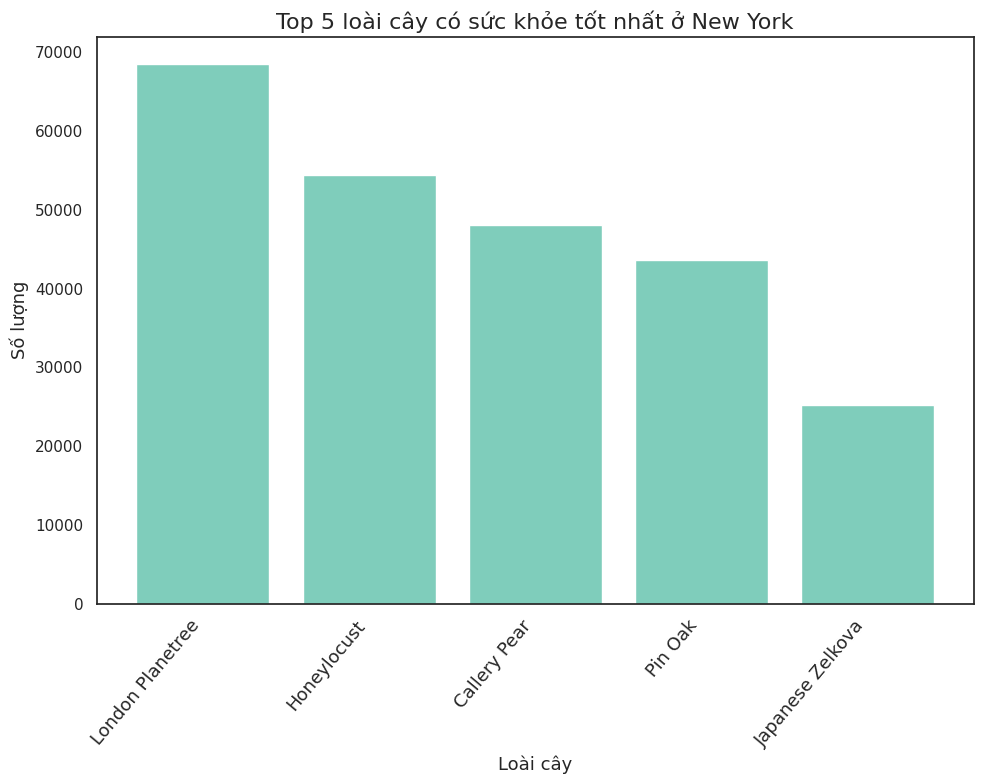

In [ ]:
# Trực quan top 5 loài cây có sức khỏe tốt nhất New York
sns.set_style("white")
goodhealth_sorted_top5 = goodhealth_sorted.head(5)
plt.figure(figsize=(10,8))
plt.bar(goodhealth_sorted_top5['Loài'], goodhealth_sorted_top5['Số lượng'], color='#7fcdbb')
plt.xlabel('Loài cây',fontsize=13)
plt.ylabel('Số lượng',fontsize=13)
plt.title('Top 5 loài cây có sức khỏe tốt nhất ở New York',fontsize=16)
plt.xticks(rotation=50, ha='right',fontsize=13)
plt.tight_layout()
plt.show()

####*Top 5 loài cây có tình trạng sức khỏe tệ nhất New York*


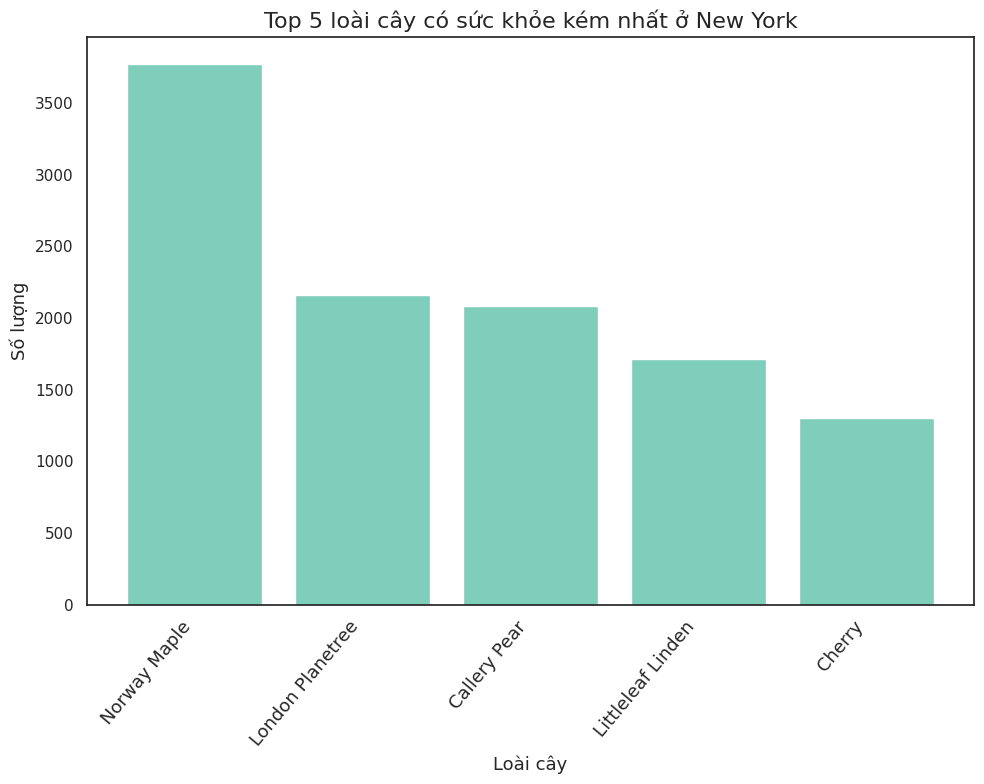

In [ ]:
# Top 5 loài cây có tình trạng sức khỏe tệ nhất New York
badhealth = tree[tree['health']=='Poor']
badhealth_sorted = badhealth[['tree_id','spc_common']]
badhealth_sorted = badhealth_sorted.groupby('spc_common').count()
badhealth_sorted = badhealth_sorted.reset_index().rename(columns={'spc_common':'Loài','tree_id':'Số lượng'})
badhealth_sorted = badhealth_sorted.sort_values(by='Số lượng',ascending=False)
badhealth_sorted.index = range(1,len(badhealth_sorted)+1)

# Trực quan top 5 loài cây có sức khỏe tệ nhất New York
badhealth_sorted_top5 = badhealth_sorted.head(5)
plt.figure(figsize=(10,8))
plt.bar(badhealth_sorted_top5['Loài'], badhealth_sorted_top5['Số lượng'], color='#7fcdbb')
plt.xlabel('Loài cây',fontsize=13)
plt.ylabel('Số lượng',fontsize=13)
plt.title('Top 5 loài cây có sức khỏe kém nhất ở New York',fontsize=16)
plt.xticks(rotation=50, ha='right',fontsize=13)
plt.tight_layout()
plt.show()

####*Kích thước của cây theo tình trạng sức khỏe*

<Figure size 800x600 with 0 Axes>

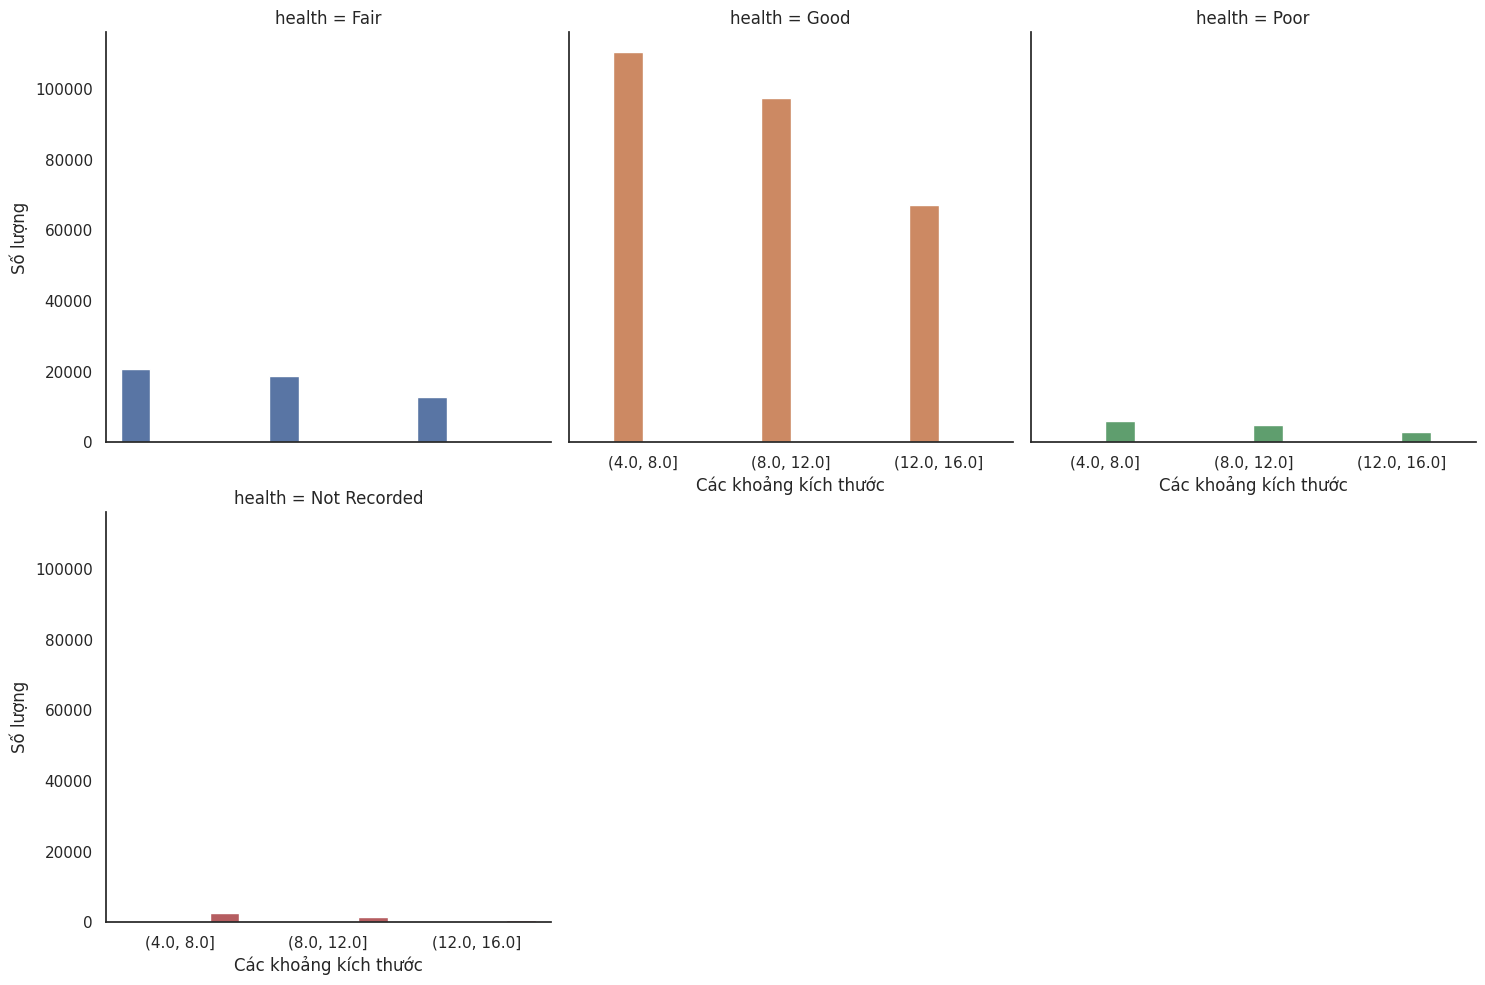

In [ ]:
# Kích thước của cây theo tình trạng sức khỏe
# Chia khoảng cho kích thước của cây
bins = [4.0,8.0,12.0,16.0]
new_labels = ['[4,8]','[9,12]','[13,16]']
tree_dbh = tree[['tree_dbh','health']]
tree_dbh['bins'] = pd.cut(tree_dbh['tree_dbh'],bins = bins)

# Trực quan dữ liệu
plt.figure(figsize=(8, 6))
g =sns.catplot(x='bins',kind='count',hue='health',data=tree_dbh,col='health',col_wrap = 3)
g.set_axis_labels('Các khoảng kích thước','Số lượng')
plt.show()

####*Tình trạng sức khỏe của 5 loài cây phổ biến nhất New York*

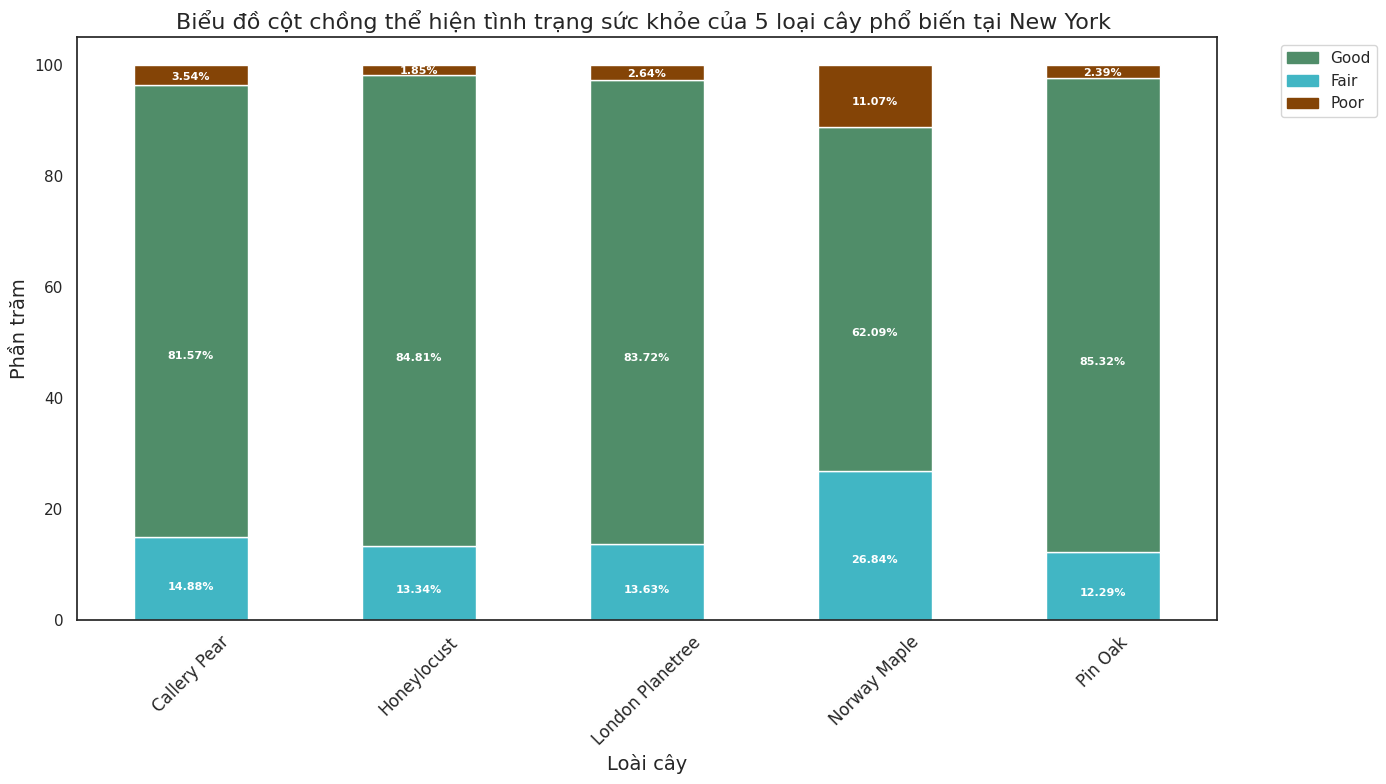

In [ ]:
# Sức khỏe của 5 loài cây phổ biến nhất thành phố New York
# Dataframe chứa 5 loài cây phổ biến nhất thành phố New York
popular_tree = tree[tree['status']=='Alive']
popular_tree_sorted = popular_tree['spc_common']
popular_tree_sorted = popular_tree_sorted.value_counts()
df = pd.DataFrame(popular_tree_sorted)
df = df.reset_index().rename(columns={'index':'Loài','spc_common':'Số lượng'}).head(5)

# DataFrame đếm số lượng cây theo tình trạng sức khỏe
filtered_data = popular_tree[popular_tree['spc_common'].isin(list(df['Loài']))]
poptree_health = pd.crosstab(filtered_data['spc_common'],popular_tree['health'])

# Trực quan hóa
column_sum = poptree_health.sum(axis=1)
poptree_health =  poptree_health.div(column_sum,axis=0) * 100
colors = {'Good':'#508D69','Fair':'#41b6c4','Poor':'#844406'}

# Vẽ biểu đồ cột chồng
ax = poptree_health.plot.bar(stacked=True, figsize=(14, 8), color=colors)

plt.title('Biểu đồ cột chồng thể hiện tình trạng sức khỏe của 5 loại cây phổ biến tại New York ', fontsize=16)
plt.xlabel('Loài cây', fontsize=14)
plt.ylabel('Phần trăm', fontsize=14)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2.5), ha='center', va='center', fontsize=8, fontweight='bold', color='white')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)

# Tạo chú thích (legend) dựa trên từng label
legend_labels = ['Good', 'Fair', 'Poor']
legend_patches = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in legend_labels]
plt.legend(legend_patches, legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

####*Các vấn đề sức khỏe cây gặp phải*

In [ ]:
## A.Root Problem

## Tạo các cột tổng hợp Root Problem, Branch Problem, Trunk Problem, Multi Problem

## Chọn ra những cột liên quan tới root problem
root_problem = tree[['root_stone','root_grate','root_other']]

## Chuyển các giá trị về dạng nhị phân bằng phương pháp get_dummies
root_problem = pd.get_dummies(root_problem, drop_first= True)

## Tạo điều kiện lọc cho Root Problem
root_condition = (root_problem['root_stone_Yes'] == 0) & (root_problem['root_grate_Yes'] == 0) & (root_problem['root_other_Yes'] == 0)

## Thêm một cột xác định cây đó có Root Problem hay không
root_problem['root_problem'] = np.where(root_condition, 0,1)

## Gán cột này vào data
tree['root_problem'] =root_problem['root_problem']

In [ ]:
## B. Branch Problem
## Tạo các cột tổng hợp Root Problem, Branch Problem, Trunk Problem, Multi Problem

## Chọn ra những cột liên quan tới root problem
branch_pro = tree[['brch_light','brch_shoe','brch_other']]

## Chuyển các giá trị về dạng nhị phân bằng phương pháp get_dummies
branch_pro = pd.get_dummies(branch_pro, drop_first= True)

## Tạo điều kiện lọc cho Root Problem
branch_condi = (branch_pro['brch_light_Yes'] == 0) & (branch_pro['brch_shoe_Yes'] == 0) & (branch_pro['brch_other_Yes'] == 0)

## Thêm một cột xác định cây đó có Root Problem hay không
branch_pro['branch_problem'] = np.where(branch_condi, 0,1)

## Gán cột này vào data
tree['branch_problem'] =branch_pro['branch_problem']

In [ ]:
# Trunk Problem
## Tạo các cột tổng hợp Root Problem, Branch Problem, Trunk Problem, Multi Problem

## Chọn ra những cột liên quan tới root problem
trunk_pro = tree[['trunk_wire','trnk_light','trnk_other']]

## Chuyển các giá trị về dạng nhị phân bằng phương pháp get_dummies
trunk_pro = pd.get_dummies(trunk_pro, drop_first= True)

## Tạo điều kiện lọc cho Root Problem
trunk_condi = (trunk_pro['trunk_wire_Yes'] == 0) & (trunk_pro['trnk_light_Yes'] == 0) & (trunk_pro['trnk_other_Yes'] == 0)

## Thêm một cột xác định cây đó có Root Problem hay không
trunk_pro['trunk_problem'] = np.where(trunk_condi, 0,1)

## Gán cột này vào data
tree['trunk_problem'] =trunk_pro['trunk_problem']

In [ ]:
## Tạo các cột tổng hợp Root Problem, Branch Problem, Trunk Problem, Multi Problem

## Chọn ra những cột liên quan tới root problem
multi_pro = tree[['root_problem','trunk_problem','branch_problem']]


## Tạo điều kiện lọc cho Root Problem
multi_cond = (
                ((multi_pro['root_problem'] == 1) & (multi_pro['trunk_problem'] == 1))
              | ((multi_pro['root_problem'] == 1) & (multi_pro['branch_problem'] == 1))
              | ((multi_pro['trunk_problem'] == 1) & (multi_pro['branch_problem'] == 1))
              | ((multi_pro['root_problem'] == 1) & (multi_pro['trunk_problem'] == 1) & (multi_pro['branch_problem'] == 1))
              )

## Thêm một cột xác định cây đó có Root Problem hay không
multi_pro['multiple_problem'] = np.where(multi_cond, 1,0)

## Gán cột này vào data
tree['multiple_problem'] =multi_pro['multiple_problem']

In [ ]:
problem_df = tree[['root_problem', 'branch_problem', 'trunk_problem','multiple_problem']]
count_problem = {'The number of tree': []}
for i, col in enumerate(problem_df.columns):
  count = sum(1 for data in problem_df[col] if data == 1)
  count_problem['The number of tree'].append(count)

count_problem_df = pd.DataFrame(count_problem
                                , index = ['Root Problem',	'Branch Problem', 'Trunk Problem',	'Multiple Problems'])

count_problem_df = count_problem_df.reset_index(names ='Tree Problem').sort_values(by = 'The number of tree')

## Set color cho từng dòng
color_df = count_problem_df.style.background_gradient(cmap='YlGnBu')
color_df

,Tree Problem,The number of tree
2,Trunk Problem,44073
3,Multiple Problems,55319
1,Branch Problem,82603
0,Root Problem,158214


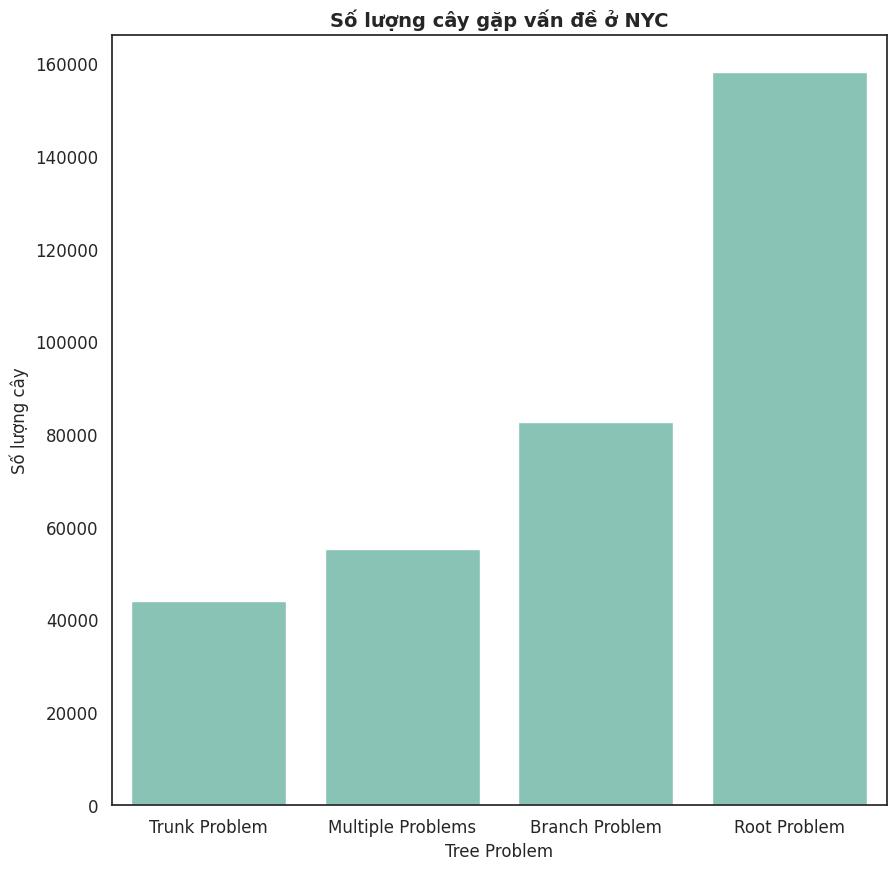

In [ ]:
## Visualize số liệu
plt.figure(figsize = (10,10))

sns.barplot(x=count_problem_df['Tree Problem'], y=count_problem_df['The number of tree'], color = "#7fcdbb")

plt.title('Số lượng cây gặp vấn đề ở NYC',fontsize = 14, weight = 'bold')
plt.ylabel('Số lượng cây', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

####*Các vấn đề sức khỏe “nan giải” theo từng loài cây*

In [ ]:
problem_group = pd.DataFrame()
pro_col = ['root_problem', 'branch_problem', 'trunk_problem']
for col in pro_col:
  pro_spc = tree[(tree[col] == 1) & (tree['health'] == "Poor")]
  group_spc = pro_spc.groupby(col)['spc_common'].value_counts().head(10)
  group_spc = group_spc.to_frame()
  group_spc = group_spc.rename(columns = {'spc_common':'count'}).reset_index()
  group_spc.drop(col, axis = 1, inplace = True)
  group_spc['problem'] = col
  problem_group = pd.concat([problem_group, group_spc], ignore_index=False )

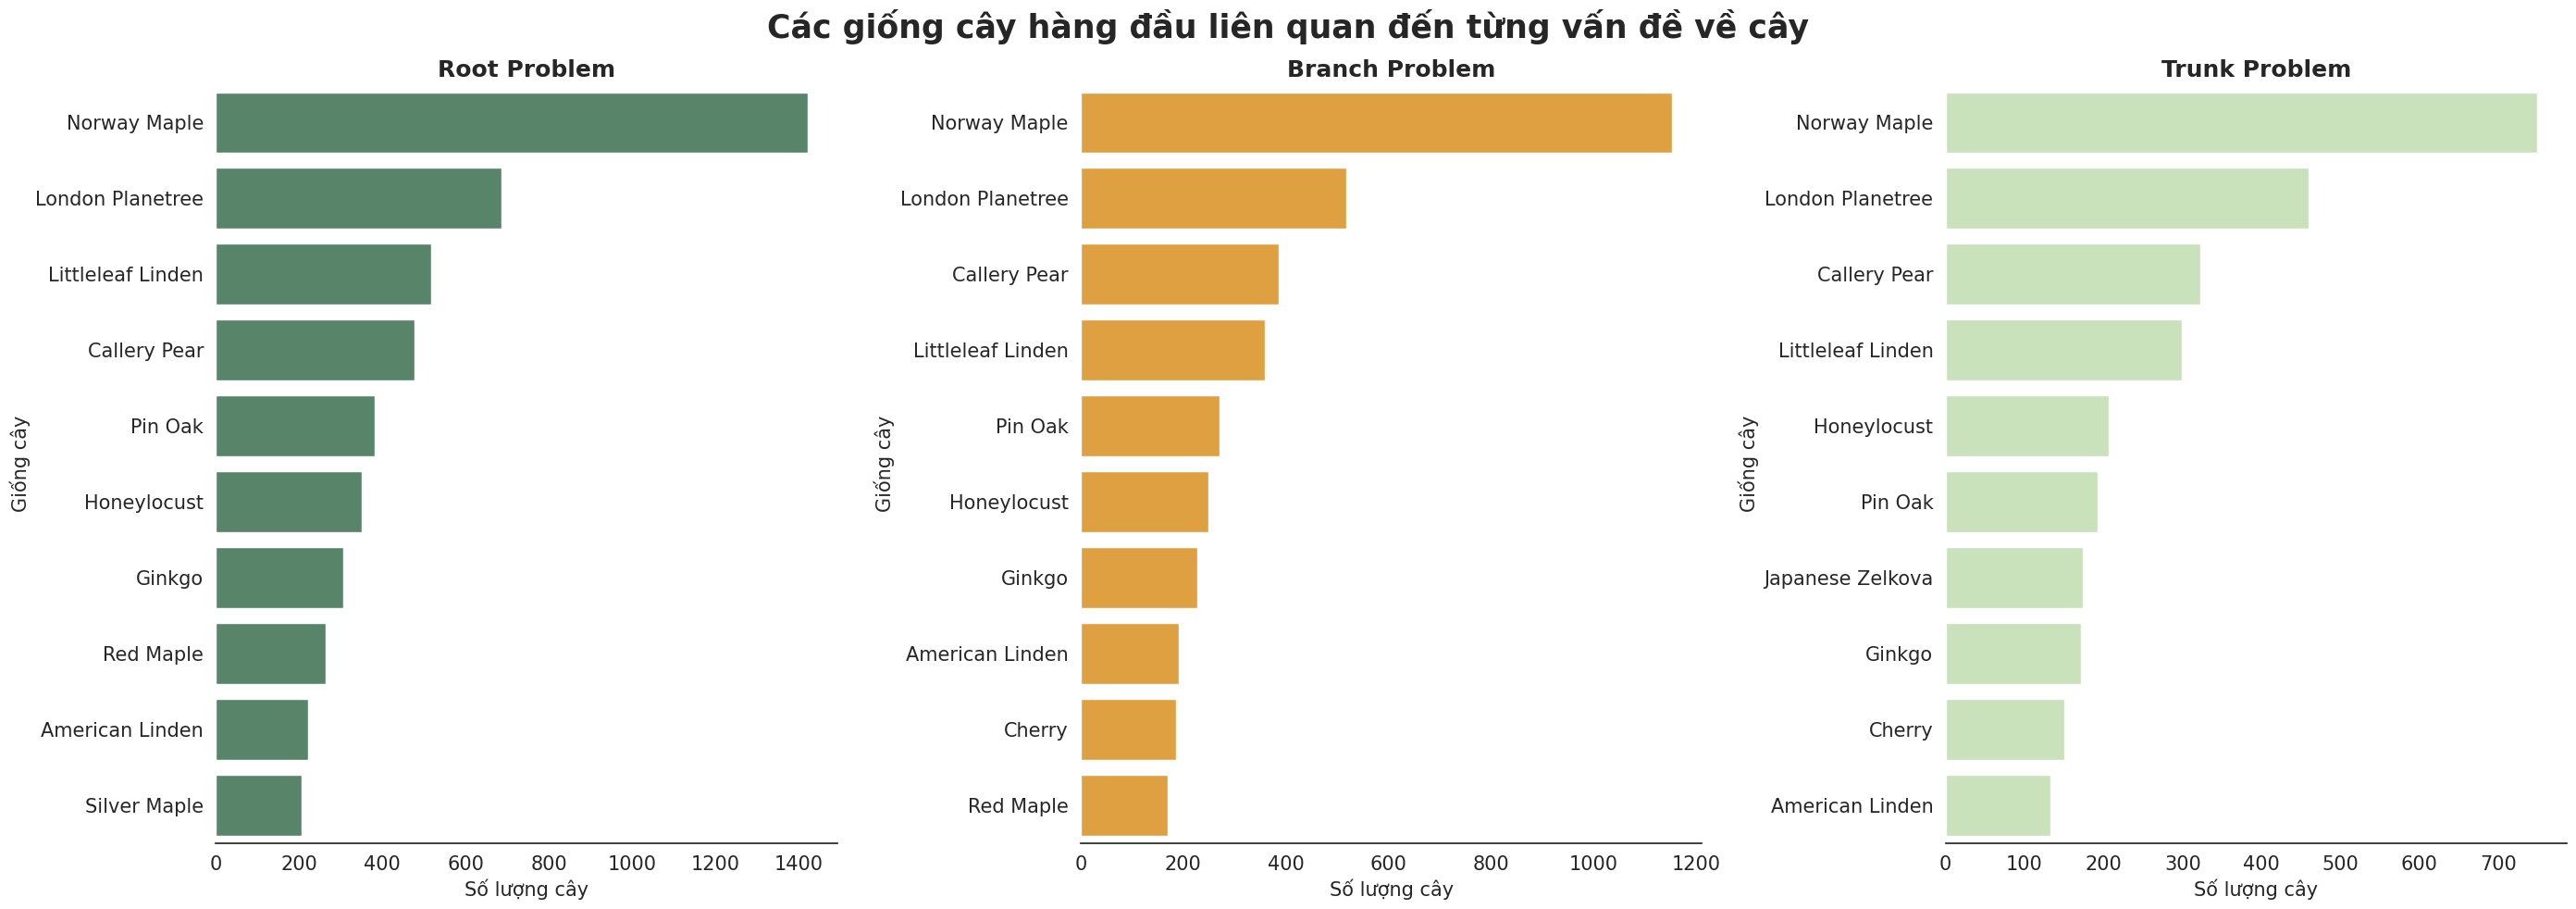

In [ ]:
## 1. Bar plot cho Root Problem
top10_root = problem_group[problem_group['problem'] == 'root_problem']

plt.figure(figsize=(28, 10))
# Vẽ biểu đồ cột nằm ngang bằng Seaborn
plt.subplot(1,3,1)
sns.barplot(x='count', y='spc_common', data=top10_root, color = '#508D69')

# Đặt tiêu đề cho biểu đồ
plt.title('Root Problem', fontsize = 18, weight = 'bold')
plt.xlabel('Số lượng cây', fontsize = 15)
plt.ylabel('Giống cây', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

## 2. Bar plot cho Branch Problem
top10_branch = problem_group[problem_group['problem'] == 'branch_problem']

# Vẽ biểu đồ cột nằm ngang bằng Seaborn
plt.subplot(1,3,2)
sns.barplot(x='count', y='spc_common', data=top10_branch, color = '#faa526')

# Đặt tiêu đề cho biểu đồ
plt.title('Branch Problem', fontsize = 18, weight = 'bold')
plt.xlabel('Số lượng cây', fontsize = 15)
plt.ylabel('Giống cây', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

## 3. Bar plot cho Trunk Problem
top10_trunk = problem_group[problem_group['problem'] == 'trunk_problem']

# Vẽ biểu đồ cột nằm ngang bằng Seaborn
plt.subplot(1,3,3)
sns.barplot(x='count', y='spc_common', data=top10_trunk, color = '#c7e9b4')

# Đặt tiêu đề cho biểu đồ
plt.title('Trunk Problem', fontsize = 18, weight = 'bold')
plt.xlabel('Số lượng cây', fontsize = 15)
plt.ylabel('Giống cây', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
sns.despine(left=True)
# Hiển thị biểu đồ
plt.suptitle('Các giống cây hàng đầu liên quan đến từng vấn đề về cây', fontsize = 25, weight = 'bold')
plt.tight_layout()
plt.show()

In [ ]:
# Tạo một danh sách các màu sắc tuỳ chỉnh
custom_colors = [ "#508D69", "#faa526", "#c7e9b4"]

# Tạo figure cho treemap
fig = px.treemap(problem_group,
                 path=["problem","spc_common"],  # Các mức cấp của treemap
                 values="count",     # Giá trị của từng phần
                 color_discrete_sequence=custom_colors,
                 title="Các giống cây hàng đầu liên quan đến từng vấn đề về cây")

fig.update_layout(
    title_x=0.5,  # Đặt tiêu đề vào giữa trục x
    title_y=0.85,  # Đặt tiêu đề ở trên cùng trục y
    title={
        "text": "<b>Các giống cây hàng đầu liên quan đến từng vấn đề về cây</b>",
        "font": {
            "family": "Arial",   # Đổi font chữ
            "size": 20           # Đổi kích thước
        }
        }
)

# Điều chỉnh font chữ cho dữ liệu
fig.update_traces(textfont={
    "family": "Arial",  # Đổi font chữ
    "size": 15          # Đổi kích thước
})

# Hiển thị biểu đồ
fig.show()

####*Biểu diễn mối quan hệ giữa mức độ hiệu quả của hàng rào bảo vệ và các vấn đề sức khỏe cây gặp phải* bold text

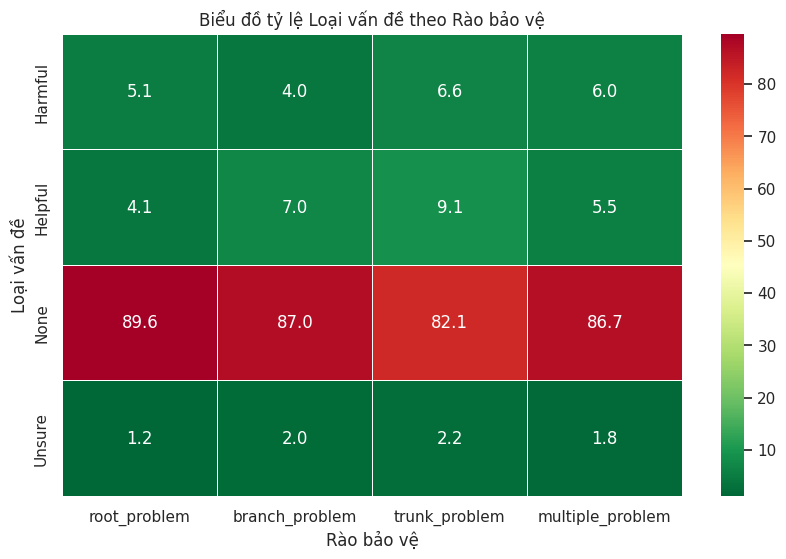

In [ ]:
guards_problem_count = tree.groupby('guards').agg({'root_problem': 'sum', 'branch_problem': 'sum', 'trunk_problem': 'sum', 'multiple_problem': 'sum'})
guards_problem_count = guards_problem_count.div(guards_problem_count.sum(axis=0), axis=1) * 100

plt.figure(figsize=(10, 6))
sns.heatmap(guards_problem_count, annot=True, cmap='RdYlGn_r', fmt=".1f", linewidths=.5)
plt.title('Biểu đồ tỷ lệ Loại vấn đề theo Rào bảo vệ')
plt.xlabel('Rào bảo vệ')
plt.ylabel('Loại vấn đề')
plt.show()

##2.Tìm hiểu thông tin về cấp độ quận

###2.1.  Thông tin về mật độ, mức độ hiệu quả của rào chắn bảo vệ và tác động của cây lên cảnh quan đô thị


####*Các giống cây phổ biến theo quận*

In [ ]:
# Tính tỷ lệ giống cây trong từng quận
species_counts_boro = []
for borough in tree.borough.unique().tolist():
    counts = tree[(tree.borough==borough) & (tree.spc_common != 'Not Recorded')].spc_common.value_counts(dropna=True, normalize=True).reset_index()
    counts.columns = ["Giống", "Tỷ lệ"]
    counts['Tỷ lệ'] = counts['Tỷ lệ'] * 100
    species_counts_boro.append(counts)

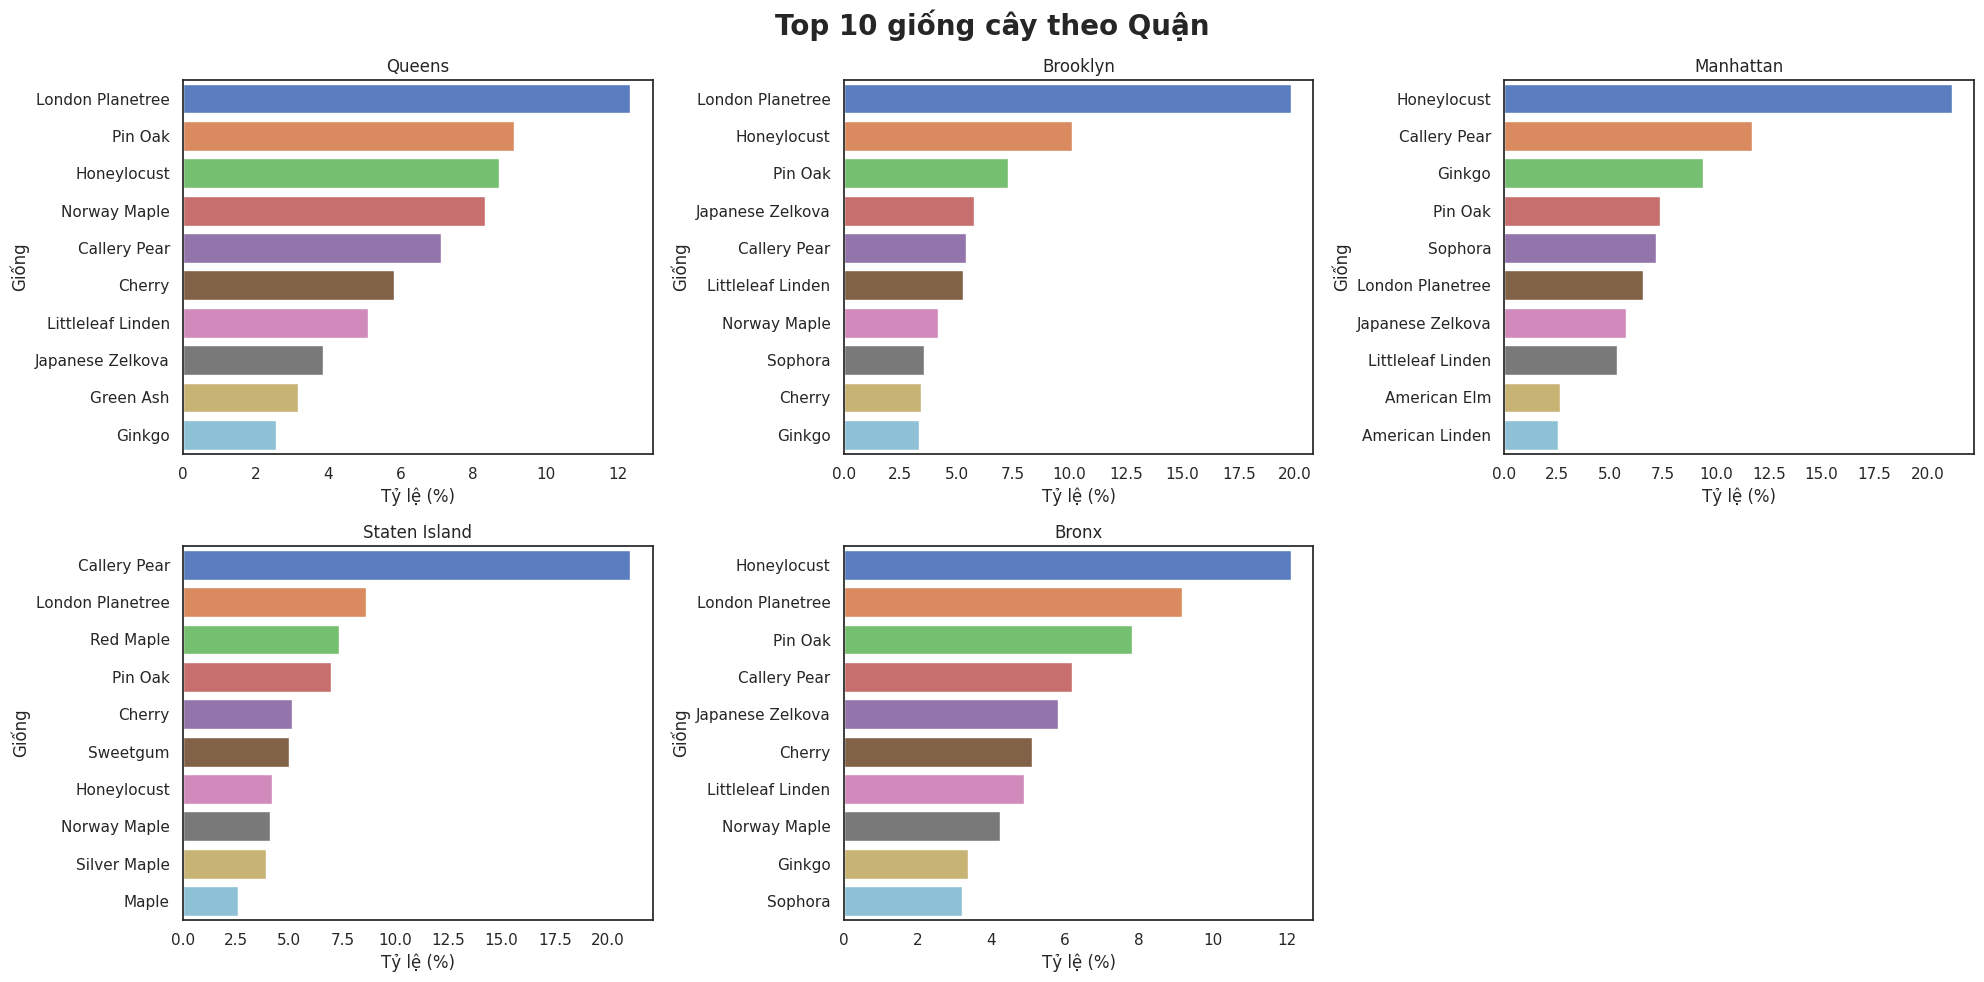

In [ ]:
# Top 10 giống cây theo quận
plt.figure(figsize=(20,10))
plt.suptitle('Top {} giống cây theo Quận'.format(10), fontsize=20, fontweight='bold')
for i, b in enumerate(tree.borough.unique().tolist()):
    ax=plt.subplot(2, 3, i+1)
    sns.barplot(data=species_counts_boro[i][:10].sort_values(by='Tỷ lệ', ascending=False), x='Tỷ lệ', y='Giống', palette='muted')
    plt.title(b)
    plt.ylabel('Giống')
    plt.xlabel('Tỷ lệ (%)')
    plt.subplots_adjust(hspace=0.5, wspace=0.8)
plt.tight_layout()
plt.show()

In [ ]:
# Vẽ biểu đồ treemap
for i, b in enumerate(tree.borough.unique().tolist()):
    fig = px.treemap(
        species_counts_boro[i][:30].sort_values(by='Tỷ lệ', ascending=False),
        path=['Giống'],
        values='Tỷ lệ',
        title=f'Treemap top 30 giống cây trong quận {b}',
        color='Tỷ lệ',
        color_continuous_scale='greens',
    )
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
    fig.show()

####*Mức độ hiệu quả của rào chắn bảo vệ cây theo quận*

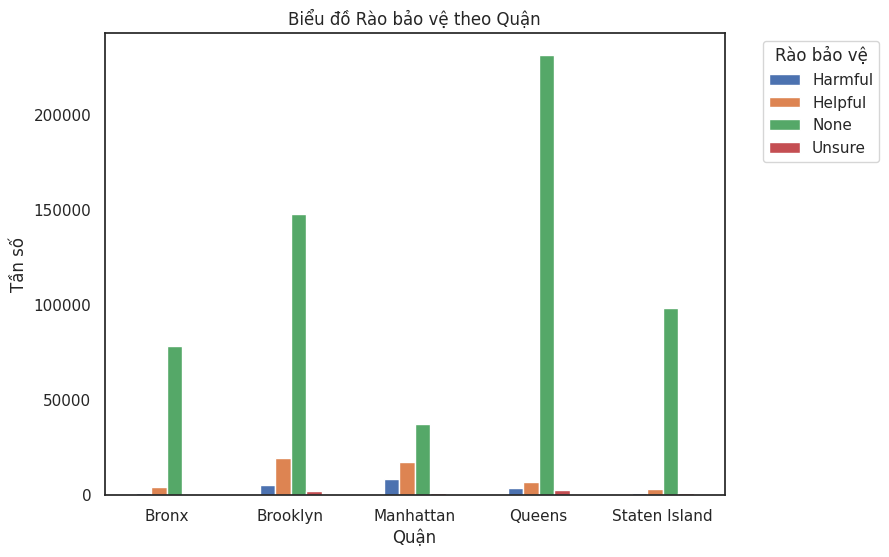

In [ ]:
guards_count_by_borough = tree.groupby(['borough', 'guards']).size().unstack(fill_value=0)

ax = guards_count_by_borough.plot(kind='bar', stacked=False, figsize=(8, 6))
plt.title('Biểu đồ Rào bảo vệ theo Quận')
plt.xlabel('Quận')
plt.ylabel('Tần số')
plt.legend(title='Rào bảo vệ', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
plt.show()

####*Các vấn đề về sức khỏe của cây theo từng quận*

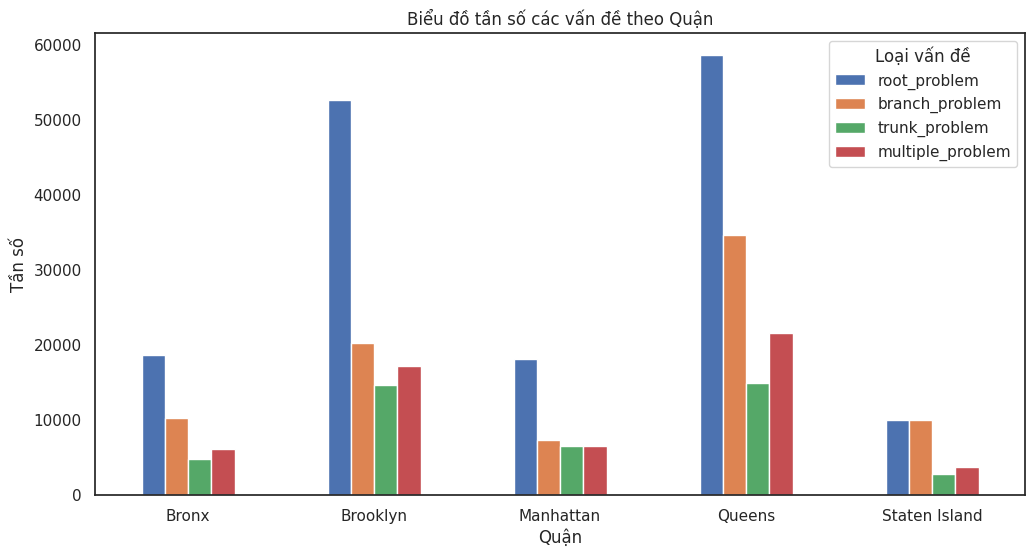

In [ ]:
borough_problem_count = tree.groupby('borough').agg({'root_problem': 'sum', 'branch_problem': 'sum', 'trunk_problem': 'sum', 'multiple_problem': 'sum'})

ax = borough_problem_count.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Biểu đồ tần số các vấn đề theo Quận')
plt.xlabel('Quận')
plt.ylabel('Tần số')
plt.legend(title='Loại vấn đề')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
plt.show()

####*Thống kê các cây cần thay rào chắn bảo vệ theo quận*

In [ ]:
borough_spc = pd.crosstab(tree[(tree['guards'] == 'None') | (tree['guards'] == 'Harmful')]['spc_common'], tree[(tree['guards'] == 'None') | (tree['guards'] == 'Harmful')]['borough'])
borough_spc['Total'] = borough_spc.sum(axis=1)
borough_spc = borough_spc.sort_values(by='Total', ascending=False)
borough_spc = borough_spc[borough_spc.index != "Not Recorded"].head(10)
borough_spc.style.background_gradient(cmap='Reds')

borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Total
spc_common,,,,,,
London Planetree,7038,30466,3044,27958,8496,77002
Honeylocust,9219,14762,9408,19397,4044,56830
Callery Pear,4608,7705,4588,15683,19729,52313
Pin Oak,5972,10597,3461,20605,6799,47434
Norway Maple,3277,6260,195,18861,3957,32550
Cherry,3711,4871,611,12641,4814,26648
Littleleaf Linden,3656,7723,2216,11253,1623,26471
Japanese Zelkova,4311,8406,2433,8488,2292,25930
Ginkgo,2499,4511,3826,5610,868,17314


In [ ]:
df_melted = pd.melt(borough_spc.drop('Total', axis=1).reset_index(), id_vars='spc_common', var_name='borough', value_name='Count')

fig = px.treemap(df_melted, path=['borough', 'spc_common'], values='Count',
                 title='Biểu đồ treemap top 10 giống cây cần thay Rào bảo vệ theo Quận',
                 color='Count', hover_data=['Count'],
                 color_continuous_scale='Reds')
fig.show()

In [ ]:
gdown.download_folder("https://drive.google.com/drive/folders/1upbIFag-6iMYqK1oMZ-44gx-SrmlRrIf", quiet=True, use_cookies=False)

['/content/Ranh giới 5 Quận ở New York/geo_export_3d293f59-1915-4dd1-b404-d21636736c21.dbf',
 '/content/Ranh giới 5 Quận ở New York/geo_export_3d293f59-1915-4dd1-b404-d21636736c21.prj',
 '/content/Ranh giới 5 Quận ở New York/geo_export_3d293f59-1915-4dd1-b404-d21636736c21.shp',
 '/content/Ranh giới 5 Quận ở New York/geo_export_3d293f59-1915-4dd1-b404-d21636736c21.shx',
 '/content/Ranh giới 5 Quận ở New York/nybb.csv',
 '/content/Ranh giới 5 Quận ở New York/nybbwi_22b/nybbwi.dbf',
 '/content/Ranh giới 5 Quận ở New York/nybbwi_22b/nybbwi.prj',
 '/content/Ranh giới 5 Quận ở New York/nybbwi_22b/nybbwi.shp',
 '/content/Ranh giới 5 Quận ở New York/nybbwi_22b/nybbwi.shp.xml',
 '/content/Ranh giới 5 Quận ở New York/nybbwi_22b/nybbwi.shx']

In [ ]:
def create_trees_geodf(variable_name, variable_value, data_frame):
    data = data_frame[data_frame[variable_name]  == variable_value]
    geometry = [Point(xy) for xy in zip(data.longitude, data.latitude)]
    geo_data_frame = gpd.GeoDataFrame(data, geometry=geometry)
    return geo_data_frame

In [ ]:
# function for plotting geolocation data on nyc borough boundaries map
def plot_geo_data(boundaries, geo_data_frame, boro_names, boro_colors, title, labels, label_variable, legend_title):
    fig = plt.figure(figsize=(15,15))
    ax = plt.subplot()
    shapes = boundaries.plot(ax=ax, alpha=0.3, edgecolor='black', cmap='tab10')

    for label, color in labels:
        data = geo_data_frame[geo_data_frame[label_variable]==label]
        marker_size = data.tree_dbh
        data.plot(ax=ax, markersize=marker_size, alpha=0.3, color=color)

    # plt custom legend
    for label, color in labels:
        plt.scatter([], [], c=color, s=200,
                label=str(label))
    plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title=legend_title)
    plt.title(title, fontsize=14, pad=20)
    plt.axis("off")
    plt.show()

In [ ]:
# Open shapefiles with NYC Borough boundaries
borough_boundaries = gpd.read_file(r'/content/Ranh giới 5 Quận ở New York/geo_export_3d293f59-1915-4dd1-b404-d21636736c21.shp')
borough_boundaries

,boro_code,boro_name,shape_area,shape_leng,geometry
0,4.0,Queens,3.040206e+09,900269.280485,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."
1,3.0,Brooklyn,1.934167e+09,728477.954082,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
2,5.0,Staten Island,1.623631e+09,325924.002076,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
3,1.0,Manhattan,6.366208e+08,359993.126318,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,2.0,Bronx,1.187194e+09,463868.599917,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


In [ ]:
boro_names = borough_boundaries.boro_name.to_list()
boro_colors = ['red', 'green', 'orange', 'blue', 'pink']
dict(list(zip(boro_names, boro_colors)))

{'Queens': 'red',
 'Brooklyn': 'green',
 'Staten Island': 'orange',
 'Manhattan': 'blue',
 'Bronx': 'pink'}

In [ ]:
thay_guard = tree[(tree['guards'] == "None") | (tree['guards'] == "Harmful")]

In [ ]:
for species in top_species['Giống'][:5]:
    plot_geo_data(
        boundaries=borough_boundaries,
        geo_data_frame=create_trees_geodf(
            variable_name='spc_common',
            variable_value=species.title(),
            data_frame=thay_guard[['spc_common', 'tree_dbh', 'health', 'longitude', 'latitude']]),
        boro_names=boro_names,
        boro_colors=boro_colors,
        title="Vị trí và sức khỏe của các cây {} cần thay Rào bảo vệ trong cả 5 quận New York ".format(species.title()),
        labels = [("Good", "green"), ("Fair", "yellow"), ("Poor", "red")],
        label_variable = 'health',
        legend_title = 'Sức khỏe'
    )

Output hidden; open in https://colab.research.google.com to view.

####*Tình trạng cây gây ảnh hưởng đến lối đi bộ tại các quận*

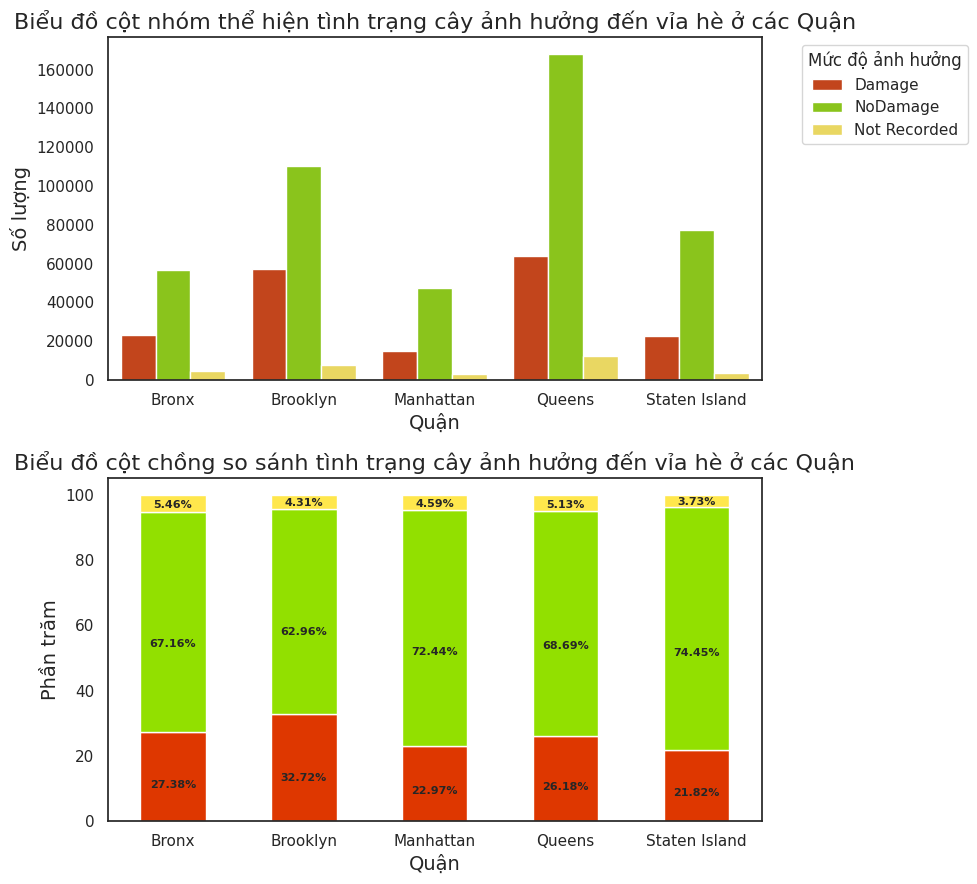

In [ ]:
# Chỉnh dạng dữ liệu
sidewalk_info = tree[['borough', 'sidewalk']]
sidewalk_info = pd.crosstab(sidewalk_info['sidewalk'], sidewalk_info['borough'])
sidewalk_df = pd.melt(sidewalk_info.reset_index(), id_vars='sidewalk')
sidewalk_df.columns = ['x', 'y', 'value']

plt.figure(figsize=(12, 8))

# Biểu đồ cột nhóm
palette_colors = {'NoDamage': '#92E000', 'Damage': '#DE3700', 'Not Recorded': '#FFE74C'}
ax1 = plt.subplot(211)
sns.barplot(x='y', y='value', hue='x', data=sidewalk_df, palette=palette_colors, ax=ax1)
ax1.set_title('Biểu đồ cột nhóm thể hiện tình trạng cây ảnh hưởng đến vỉa hè ở các Quận', fontsize=16)
ax1.set_xlabel('Quận', fontsize=14)
ax1.set_ylabel('Số lượng', fontsize=14)
ax1.legend(title='Mức độ ảnh hưởng', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(False)

# Biểu đồ cột chồng
sidewalk_inf = tree[['borough', 'sidewalk']]
sidewalk_inf = pd.crosstab(sidewalk_inf['borough'], sidewalk_inf['sidewalk'])
sidewalk_inf = sidewalk_inf.div(sidewalk_inf.sum(axis=1), axis=0) * 100
ax2 = plt.subplot(212)
sidewalk_inf.plot.bar(stacked=True, figsize=(10, 9), color=palette_colors, ax=ax2)
ax2.set_title('Biểu đồ cột chồng so sánh tình trạng cây ảnh hưởng đến vỉa hè ở các Quận', fontsize=16)
ax2.set_xlabel('Quận', fontsize=14)
ax2.set_ylabel('Phần trăm', fontsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.grid(False)
for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax2.annotate(f'{height:.2f}%', (x + width/2, y + height/2.5), ha='center', va='center', fontsize=8,fontweight='bold')
ax2.get_legend().remove()

plt.tight_layout()
plt.show()

####*Lượng cây gây hư hại đối với lối đi bộ theo các quận*

In [ ]:
# Số lượng cây gây hư hại cho vỉa hè theo từng quận
damage = tree[tree['sidewalk']=='Damage']
borough_damage = damage[['borough','spc_common']]
borough_damage = pd.crosstab(borough_damage['spc_common'],borough_damage['borough'])
borough_damage['Total'] = borough_damage.sum(axis=1)
borough_damage = borough_damage.sort_values(by='Total',ascending=False)
borough_damage = borough_damage.head(20)
borough_damage.style.background_gradient(cmap='Reds')

borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Total
spc_common,,,,,,
London Planetree,2560,14925,965,10194,3092,31736
Honeylocust,3645,6836,4077,7121,1157,22836
Pin Oak,2064,4758,1130,7703,2272,17927
Callery Pear,1396,2768,1763,3509,3412,12848
Norway Maple,1181,2758,86,5969,1125,11119
Littleleaf Linden,1170,3162,694,3731,478,9235
Japanese Zelkova,1313,2767,690,2090,487,7347
Green Ash,661,1542,208,2942,761,6114
Sophora,835,2050,1180,1422,253,5740


In [ ]:
borough_damagemelted = pd.melt(borough_damage.drop('Total', axis=1).reset_index(), id_vars='spc_common', var_name='borough', value_name='Count')
fig = px.treemap(borough_damagemelted, path=['borough', 'spc_common'], values='Count',
                 title='Biểu đồ Treemap thể hiện số lượng cây gây hư hại cho vỉa hè theo từng Quận',
                 color='Count', hover_data=['Count'],
                 color_continuous_scale='RdBu')
fig.update_layout(height=800,width=1200)
fig.show()

###2.2.  Thông tin về trạng thái, sức khỏe của cây theo quận

####*Trạng thái của cây theo quận*

In [ ]:
# Tỷ lệ cây sống và cây chết của các Quận
status_borough = tree[['status','borough']].copy()

# Hàm thay đổi giá trị 'Dead' và 'Stump'
def replace_status(row):
    if row['status'] in ['Dead', 'Stump']:
        return 'Dead'
    else:
        return row['status']

# Áp dụng hàm replace_status vào cột 'status' để thay đổi giá trị
status_borough['status'] = status_borough.apply(lambda row: replace_status(row), axis=1)

In [ ]:
status_borough = pd.crosstab(status_borough['borough'],status_borough['status'])
status_borough
status_borough = status_borough.div(status_borough.sum(axis=1), axis=0) * 100
status_borough = status_borough.reset_index()

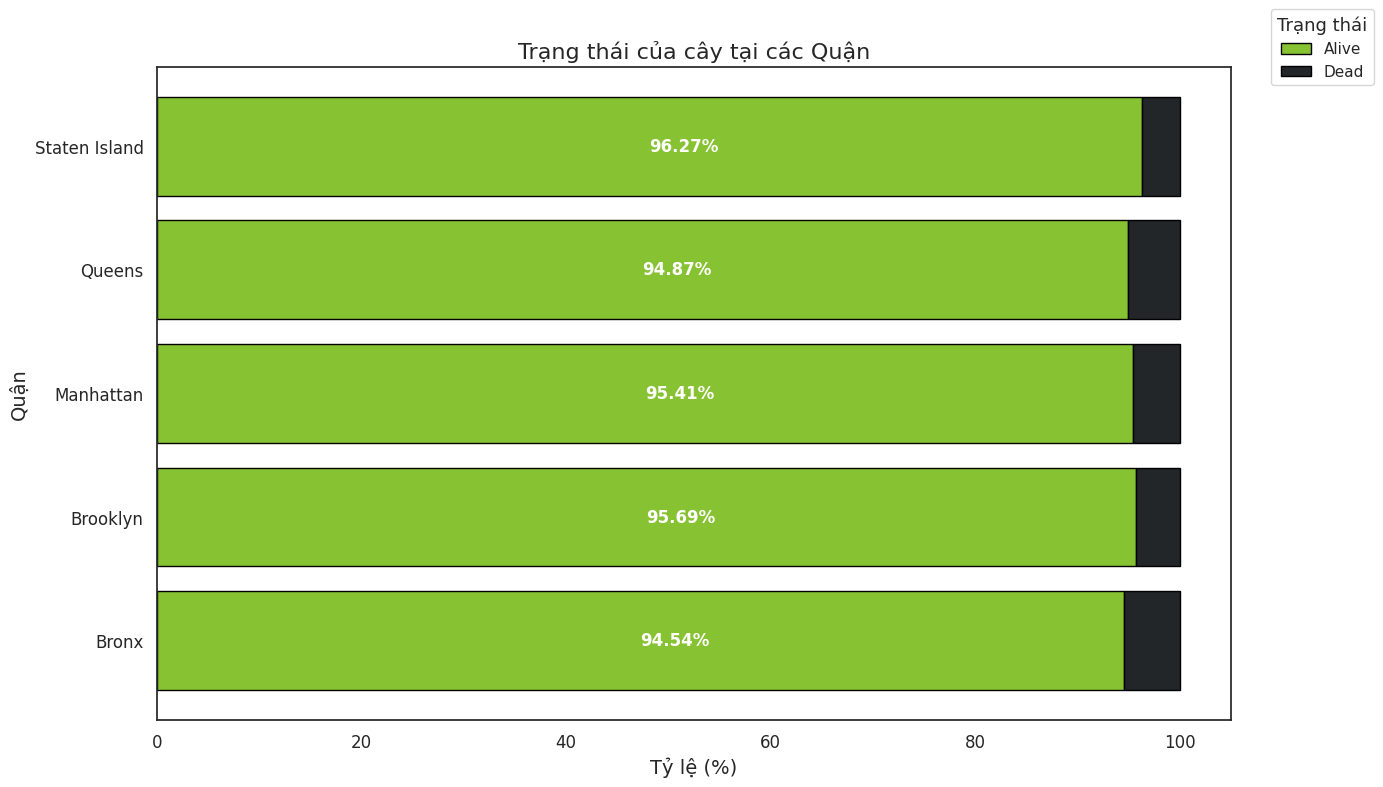

In [ ]:
status_borough.reset_index()
borough_arr = status_borough['borough'].values
alive_rate_arr = status_borough['Alive'].values
dead_rate_arr = status_borough['Dead'].values
# Vẽ biểu đồ cột ngang với việc xoay ngang cột
plt.figure(figsize=(14, 8))
plt.barh(borough_arr, alive_rate_arr, color='#86C232', label='Alive', edgecolor='black')  # Cột cây sống
plt.barh(borough_arr, dead_rate_arr, color='#222629', label='Dead', left=alive_rate_arr, edgecolor='black')  # Cột chồng lên cột cây sống

# Hiển thị % tương ứng trên các cột
for i, (alive, dead) in enumerate(zip(alive_rate_arr, dead_rate_arr)):
    plt.text(alive - alive/2, i, f'{alive:.2f}%', va='center', color='white',fontweight = 'bold')

# Hiển thị legend ở vị trí ngoài cùng và đặt tiêu đề cho legend
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1.1),title='Trạng thái',title_fontsize='13')
plt.xlabel('Tỷ lệ (%)',fontsize = 14)
plt.ylabel('Quận',fontsize=14)
plt.title('Trạng thái của cây tại các Quận',fontsize=16)
plt.xticks(fontsize=12)  # Chỉnh kích thước và màu sắc chữ trên trục x
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

####*Sức khỏe của cây theo quận*

In [ ]:
tree_alive = tree[tree['status'] == 'Alive']
# Đổi cột health thành categorical và sắp xếp theo tần số
tree_alive['health'] = pd.Categorical(tree_alive['health'], tree_alive.health.value_counts().index.tolist())

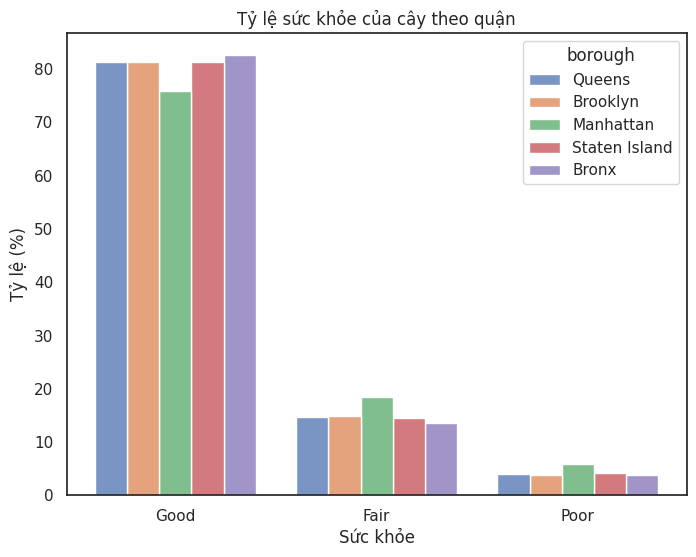

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=tree_alive, x='health', hue='borough', multiple='dodge', stat='percent', shrink=0.8, common_norm=False)
plt.title('Tỷ lệ sức khỏe của cây theo quận')
plt.ylabel('Tỷ lệ (%)')
plt.xlabel('Sức khỏe')
plt.show()

In [ ]:
# Đếm các giá trị của top 10 cây phổ biến nhất theo tình trạng
top_species = species_counts[:10]
top_species_status = tree[tree.spc_common.isin(list(top_species['Giống']))]['status'].value_counts()

# Tính tỷ lệ tình trạng của tất cả cây
status_counts = tree.status.value_counts(normalize=True)*100

# Tính tỷ lệ sức khỏe của cây
health_counts = tree[tree.status=='Alive'].health.value_counts(normalize=True)*100

# Tính tỷ lệ sức khỏe theo quận
health_counts_boro = tree[tree.status=='Alive'].groupby('borough')['health'].value_counts(normalize=True).unstack().sort_values(by='Good')
health_counts_boro[['Fair', 'Good', 'Poor']] = health_counts_boro[['Fair', 'Good', 'Poor']]*100

# Tính tỷ lệ sức khỏe theo giống cây
health_counts_top_species = tree[((tree.status=='Alive')&(tree.spc_common.isin(list(top_species['Giống']))))].groupby('spc_common')['health'].value_counts(normalize=True).unstack().sort_values(by='Good')
health_counts_top_species[['Fair', 'Good', 'Poor']] = health_counts_top_species[['Fair', 'Good', 'Poor']]*100


In [ ]:
print("{}% số cây ở New York còn sống ({}), {}% chỉ còn gốc ({}), và {}% đã chết ({}).".format(
    round(status_counts[0], 1),
    status_counts.index[0].lower(),
    round(status_counts[1], 1),
    status_counts.index[1].lower(),
    round(status_counts[2], 1),
    status_counts.index[2].lower()
))
print("{}% số cây còn sống có sức khỏe tốt ({}), {}% có sức khỏe ổn ({}), và {}% đang trong tình trạng xấu ({}).\n".format(
    round(health_counts[0], 1),
    health_counts.index[0].lower(),
    round(health_counts[1], 1),
    health_counts.index[1].lower(),
    round(health_counts[2], 1),
    health_counts.index[2].lower()
))
print("Trong quận {}, tỷ lệ cây có sức khỏe tốt là dưới trung bình. {}% số cây ở {} có health là {}, thấp hơn {}% so với mức trung bình.\n".format(
    health_counts_boro.index[0],
    round(health_counts_boro.Good[0], 1),
    health_counts_boro.index[0],
    health_counts_boro.columns[1].lower(),
    round((health_counts[0] - health_counts_boro.Good[0]), 1)
))
print("Sức khỏe cây tại quận {} tốt hơn trung bình một chút. {}% số cây ở {} có health là {}, cao hơn {}% so với mức trung bình.\n".format(
    health_counts_boro.index[-1],
    round(health_counts_boro.Good[-1], 1),
    health_counts_boro.index[-1],
    health_counts_boro.columns[1].lower(),
    round(abs(health_counts[0] - health_counts_boro.Good[-1]), 1)
))
print("Trong 3 quận còn lại, tỷ lệ cây có health là {} xấp xỉ mức trung bình ({}%).\n{}% số cây ở {} có health là {}, quận {} có {}%, và quận {} có {}%.".format(
    health_counts_boro.columns[1].lower(),
    round(health_counts[0], 1),
    round(health_counts_boro.Good[1], 1),
    health_counts_boro.index[1],
    health_counts_boro.columns[1].lower(),
    health_counts_boro.index[2],
    round(health_counts_boro.Good[2], 1),
    health_counts_boro.index[3],
    round(health_counts_boro.Good[3], 1)
))
print("\nTrong số top {} giống cây phổ biến nhất, có {} cây {}, {} cây {}, và {} cây {}.\n".format(
    len(top_species),
    top_species_status[0],
    top_species_status.index[0].lower(),
    top_species_status[1],
    top_species_status.index[1].lower(),
    top_species_status[2],
    top_species_status.index[2].lower()
))
print("Trong danh sách top {} đó, {} là giống cây với tỷ lệ sức khỏe {} thấp nhất.\nChỉ có {}% cây {} có health là {}, thấp hơn {}% so với mức trung bình.".format(
    len(top_species),
    health_counts_top_species.index[0],
    health_counts_top_species.columns[1].lower(),
    round(health_counts_top_species.Good[0], 1),
    health_counts_top_species.index[0],
    health_counts_top_species.columns[1].lower(),
    round(abs(health_counts[0] - health_counts_top_species.Good[0]), 1)
))

95.3% số cây ở New York còn sống (alive), 2.6% chỉ còn gốc (stump), và 2.1% đã chết (dead).
80.9% số cây còn sống có sức khỏe tốt (good), 14.9% có sức khỏe ổn (fair), và 4.2% đang trong tình trạng xấu (poor).

Trong quận Manhattan, tỷ lệ cây có sức khỏe tốt là dưới trung bình. 75.8% số cây ở Manhattan có health là good, thấp hơn 5.1% so với mức trung bình.

Sức khỏe cây tại quận Bronx tốt hơn trung bình một chút. 82.6% số cây ở Bronx có health là good, cao hơn 1.6% so với mức trung bình.

Trong 3 quận còn lại, tỷ lệ cây có health là good xấp xỉ mức trung bình (80.9%).
81.3% số cây ở Brooklyn có health là good, quận Queens có 81.3%, và quận Staten Island có 81.4%.

Trong số top 10 giống cây phổ biến nhất, có 399369 cây alive, 17654 cây stump, và 13940 cây dead.

Trong danh sách top 10 đó, Norway Maple là giống cây với tỷ lệ sức khỏe good thấp nhất.
Chỉ có 62.1% cây Norway Maple có health là good, thấp hơn 18.9% so với mức trung bình.


####*Các vấn đề về sức khỏe của cây theo quận*

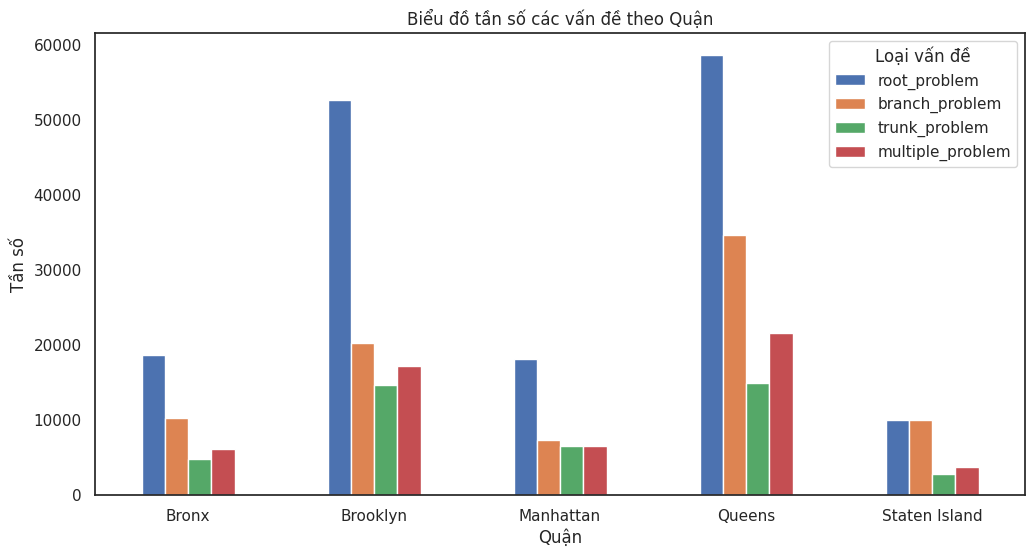

In [ ]:
borough_problem_count = tree.groupby('borough').agg({'root_problem': 'sum', 'branch_problem': 'sum', 'trunk_problem': 'sum', 'multiple_problem': 'sum'})

ax = borough_problem_count.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Biểu đồ tần số các vấn đề theo Quận')
plt.xlabel('Quận')
plt.ylabel('Tần số')
plt.legend(title='Loại vấn đề')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
plt.show()

####*Cây có sức khỏe tốt theo từng quận*

In [ ]:
# Các giống cây có tình trạng sức khỏe tốt của các Quận
goodhealth_borough = goodhealth[['borough','spc_common']]
goodhealth_borough = pd.crosstab(goodhealth_borough['spc_common'],goodhealth_borough['borough'])
goodhealth_borough['Total'] = goodhealth_borough.sum(axis=1)
goodhealth_borough = goodhealth_borough.sort_values(by='Total',ascending=False)
goodhealth_borough = goodhealth_borough.head(20)
borough_damage.style.background_gradient(cmap='summer')

borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Total
spc_common,,,,,,
London Planetree,2560,14925,965,10194,3092,31736
Honeylocust,3645,6836,4077,7121,1157,22836
Pin Oak,2064,4758,1130,7703,2272,17927
Callery Pear,1396,2768,1763,3509,3412,12848
Norway Maple,1181,2758,86,5969,1125,11119
Littleleaf Linden,1170,3162,694,3731,478,9235
Japanese Zelkova,1313,2767,690,2090,487,7347
Green Ash,661,1542,208,2942,761,6114
Sophora,835,2050,1180,1422,253,5740


In [ ]:
goodhealth_boroughmelted = pd.melt(goodhealth_borough.drop('Total', axis=1).reset_index(), id_vars='spc_common', var_name='borough', value_name='Count')
fig = px.treemap(goodhealth_boroughmelted, path=['borough', 'spc_common'], values='Count',
                 title='Biểu đồ Treemap thể hiện số lượng cây có sức khỏe tốt theo từng Quận',
                 color='Count', hover_data=['Count'],
                 color_continuous_scale='YlGnBu')
fig.update_layout(height=800,width=1200)
fig.show()

####*Đường kính trung bình của cây theo quận*

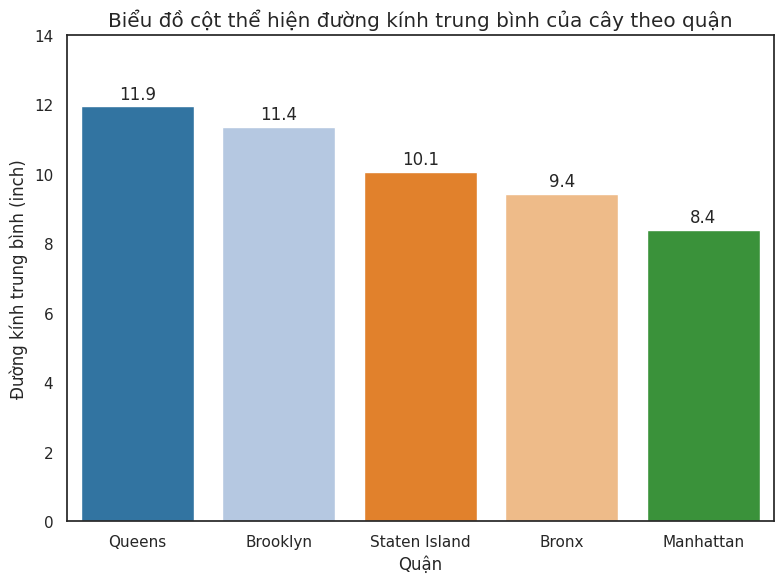

In [ ]:
# Đường kính trung bình của cây theo quận huyện
dbh_borough = tree[['tree_dbh','borough']]
dbh_borough = dbh_borough.groupby('borough')['tree_dbh'].mean().sort_values(ascending=False)
dbh_borough_df = dbh_borough.reset_index().rename(columns={'borough':'Quận','tree_dbh':'Đường kính trung bình'})
dbh_borough_df.index = dbh_borough_df.index + 1

# Trực quan đường kính trung bình của cây theo quận
plt.figure(figsize=(8,6))
plt.title('Biểu đồ cột thể hiện đường kính trung bình của cây theo quận',fontsize='large')
plt.ylim(0,12)
ax = sns.barplot(x='Quận',y='Đường kính trung bình',data = dbh_borough_df, palette = 'tab20')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.xlabel('Quận')
plt.ylabel('Đường kính trung bình (inch)')
plt.ylim(0,14)
plt.tight_layout()
plt.show()


#####*Quận Queens*

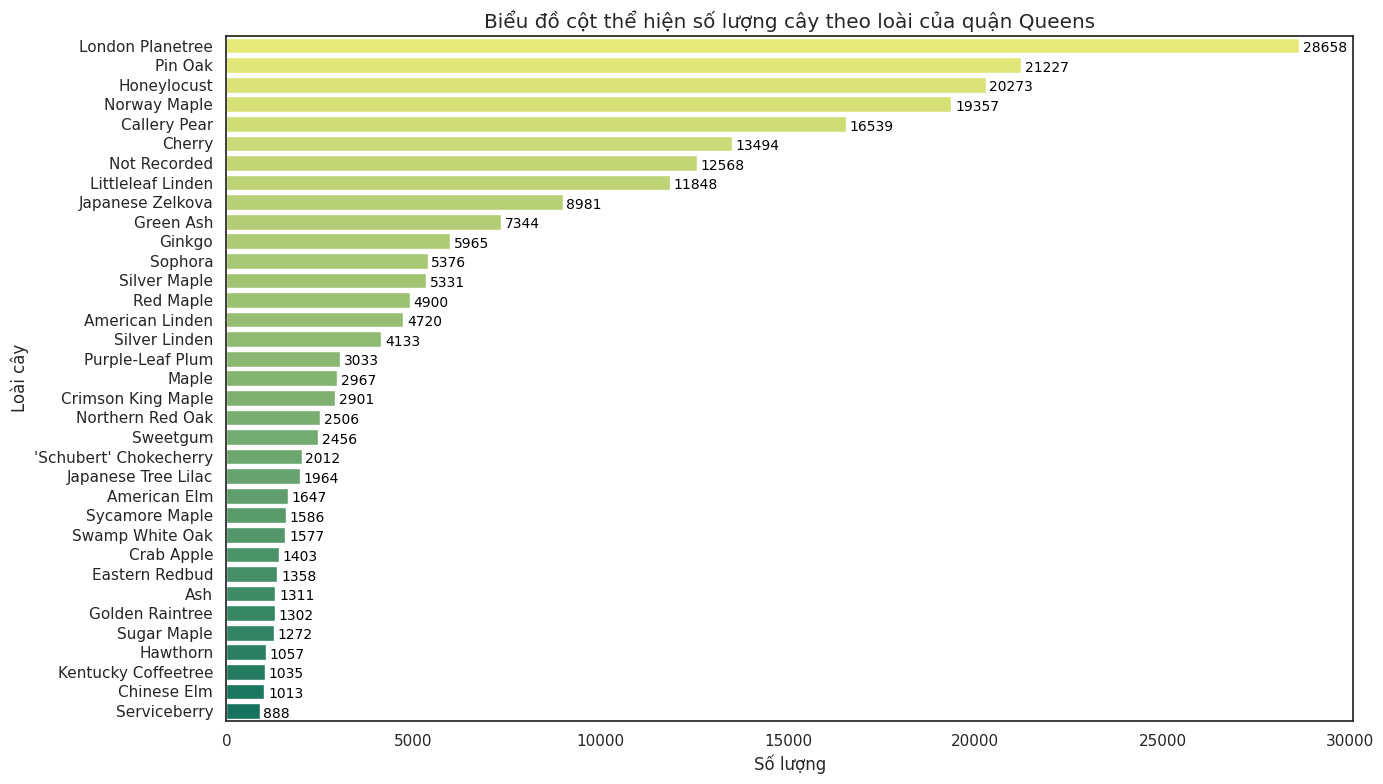

In [ ]:
# Số lượng các loại cây tại quận Queens
Q_borough = tree[tree['borough'] == 'Queens']
Q_treeinfo = Q_borough[['spc_common','tree_id','tree_dbh']]
Q_treeinfo = Q_treeinfo.groupby('spc_common').agg({'tree_id':'count','tree_dbh':'mean'})
Q_treeinfo_df = Q_treeinfo.reset_index().rename(columns={'spc_common':'Loài','tree_id':'Số lượng','tree_dbh':'Đường kính trung bình'})
Q_treeinfo_df = Q_treeinfo_df.sort_values(by='Số lượng',ascending=False)
Q_treeinfo_df.index = range(1,len(Q_treeinfo_df)+1)

#Biểu diễn trực quan số lượng loài cây trong quận Queens
plt.figure(figsize=(14,8))
plt.title('Biểu đồ cột thể hiện số lượng cây theo loài của quận Queens',fontsize='large')
ax = sns.barplot(x='Số lượng',y='Loài',data = Q_treeinfo_df.iloc[:35,:],palette = 'summer_r')
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}',
                (p.get_width()+100, p.get_y() + p.get_height() / 1.5),
                ha='left', va='center', fontsize=10, color='black')
plt.ylabel('Loài cây')
plt.tight_layout()
plt.show()

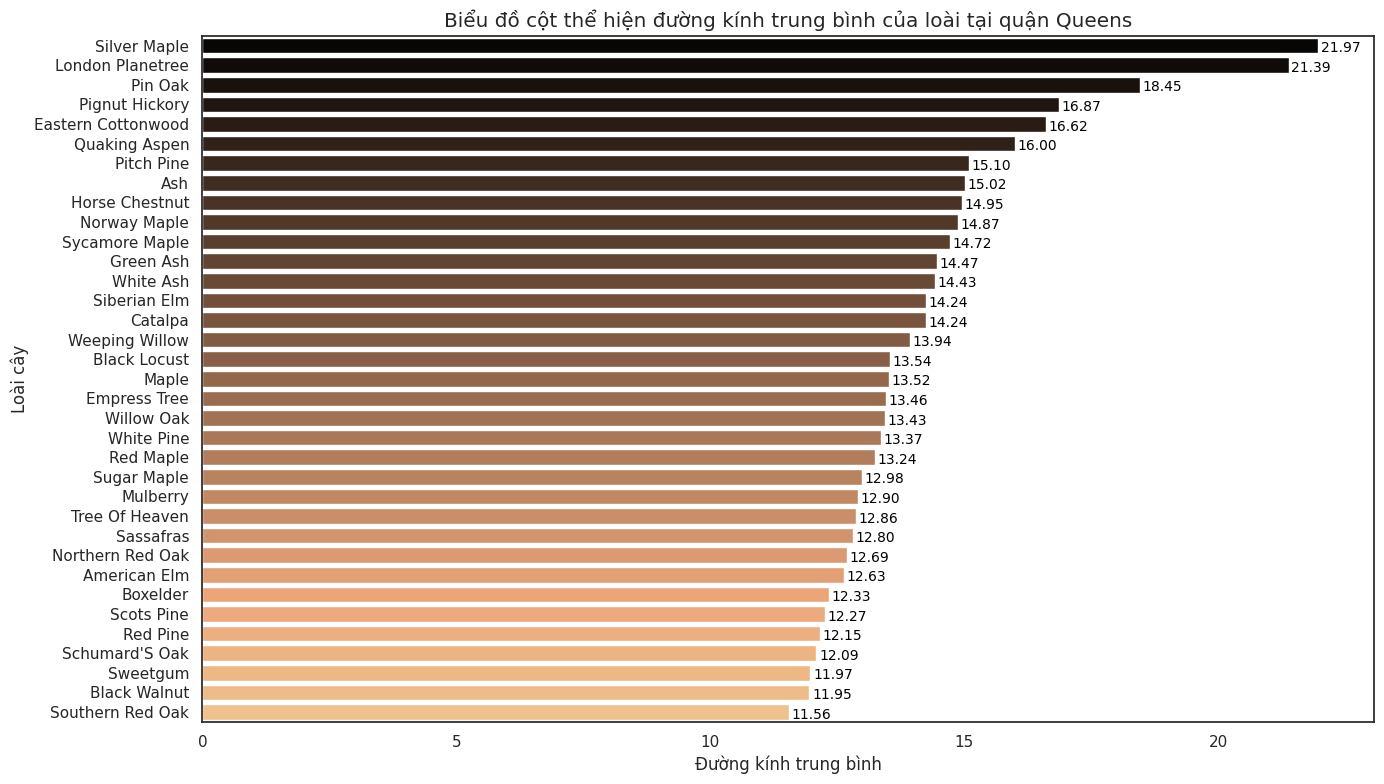

In [ ]:
#Biểu diễn trực quan đường kính trung bình của các loài cây trong quận Queens
plt.figure(figsize=(14,8))
plt.title('Biểu đồ cột thể hiện đường kính trung bình của loài tại quận Queens',fontsize='large')
ax = sns.barplot(x='Đường kính trung bình',y='Loài',data = Q_treeinfo_df.sort_values(by='Đường kính trung bình',ascending=False).iloc[:35,:],palette = 'copper')
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',
                (p.get_width()+0.05, p.get_y() + p.get_height()/1.5),
                ha='left', va='center', fontsize=10, color='black')
plt.ylabel('Loài cây')
plt.tight_layout()
plt.show()

In [ ]:
# Độ phổ biến của các cây có đường kính trung bình lớn trong quận Queens
Q_spc_arr = []
Q_common_rank = []
Q_mean_dbh = []
Q_meandbh_rank = []
Q_common_spc_arr = Q_treeinfo_df['Loài'].values
Q_large_dbh = Q_treeinfo_df.sort_values(by='Đường kính trung bình', ascending=False).iloc[:35:]
Q_large_dbh_dict = dict(zip(Q_large_dbh['Loài'],Q_large_dbh['Đường kính trung bình']))
for j in range(0,len(Q_common_spc_arr)):
  for key,value in Q_large_dbh_dict.items():
    if key == Q_common_spc_arr[j]:
        Q_spc_arr.append(key)
        Q_common_rank.append(j+1)
        Q_mean_dbh.append(value)
        Q_meandbh_rank.append(list(Q_large_dbh_dict.keys()).index(key)+1)

Q_largecommon_tree = pd.DataFrame({'Loài':Q_spc_arr,'Độ phổ biến':Q_common_rank,'Đường kính trung bình':Q_mean_dbh,'Xếp hạng đường kính trung bình':Q_meandbh_rank})
Q_largecommon_tree = Q_largecommon_tree.sort_values(by=['Độ phổ biến','Xếp hạng đường kính trung bình'],ascending=[True,True])
html_text = "<p style='text-align: left center; color: #438c7c; font-size: 20px; font-weight: bold; font-family: Arial;'> Độ phổ biến của các cây có đường kính trung bình lớn trong quận Queens</p>"
display(HTML(html_text))
Q_largecommon_tree

,Loài,Độ phổ biến,Đường kính trung bình,Xếp hạng đường kính trung bình
0,London Planetree,1,21.392072,2
1,Pin Oak,2,18.453102,3
2,Norway Maple,4,14.874154,10
3,Green Ash,10,14.472358,12
4,Silver Maple,13,21.971675,1
5,Red Maple,14,13.235918,22
6,Maple,18,13.517695,18
7,Northern Red Oak,20,12.690343,27
8,Sweetgum,21,11.974349,33
9,American Elm,24,12.625379,28


#####*Quận Manhattan*

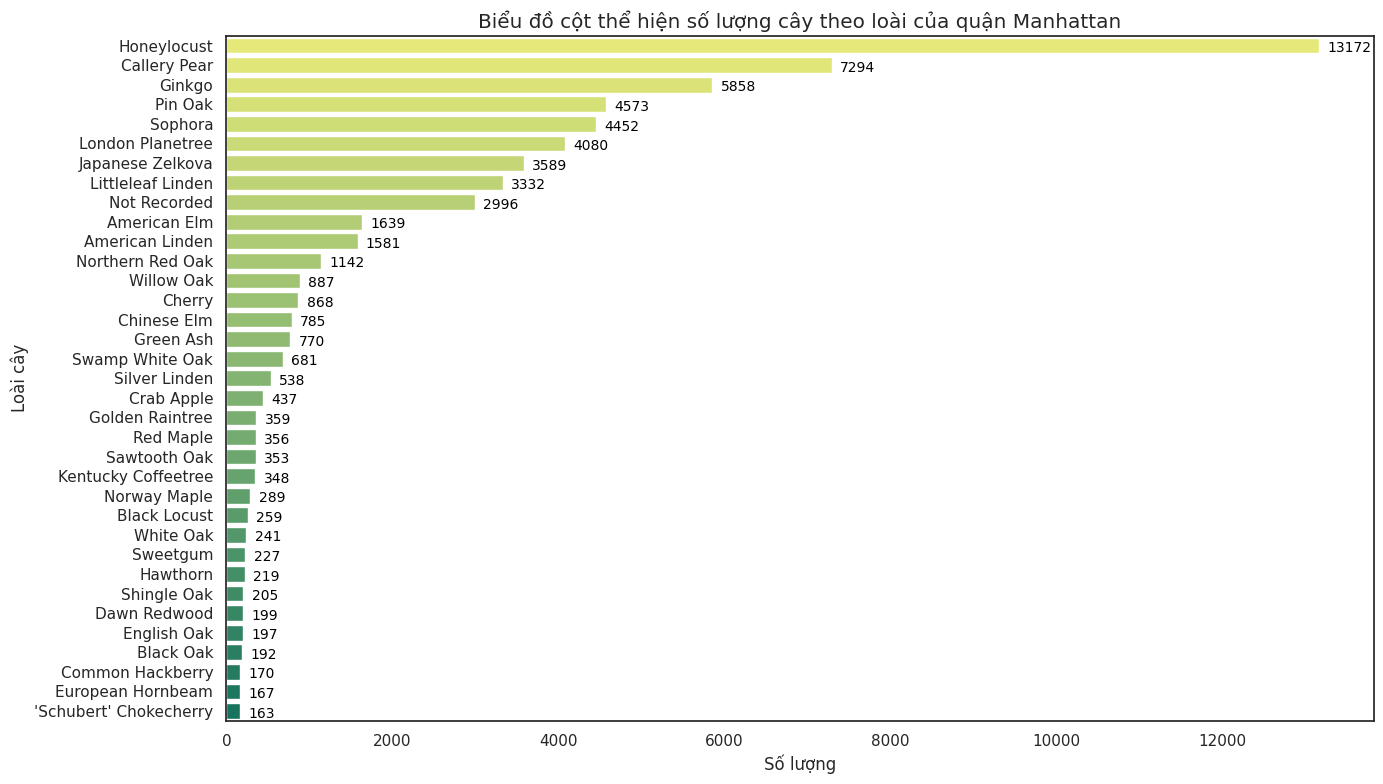

In [ ]:
# Số lượng các loại cây tại quận Manhattan
M_borough = tree[tree['borough'] == 'Manhattan']
M_treeinfo = M_borough[['spc_common','tree_id','tree_dbh']]
M_treeinfo = M_treeinfo.groupby('spc_common').agg({'tree_id':'count','tree_dbh':'mean'})
M_treeinfo_df = M_treeinfo.reset_index().rename(columns={'spc_common':'Loài','tree_id':'Số lượng','tree_dbh':'Đường kính trung bình'})
M_treeinfo_df = M_treeinfo_df.sort_values(by='Số lượng',ascending=False)
M_treeinfo_df.index = range(1,len(M_treeinfo_df)+1)

#Biểu diễn trực quan số lượng loài cây trong quận Manhattan
plt.figure(figsize=(14,8))
plt.title('Biểu đồ cột thể hiện số lượng cây theo loài của quận Manhattan',fontsize='large')
ax = sns.barplot(x='Số lượng',y='Loài',data = M_treeinfo_df.iloc[:35,:],palette = 'summer_r')
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}',
                (p.get_width()+100, p.get_y() + p.get_height() / 1.5),
                ha='left', va='center', fontsize=10, color='black')
plt.ylabel('Loài cây')
plt.tight_layout()
plt.show()


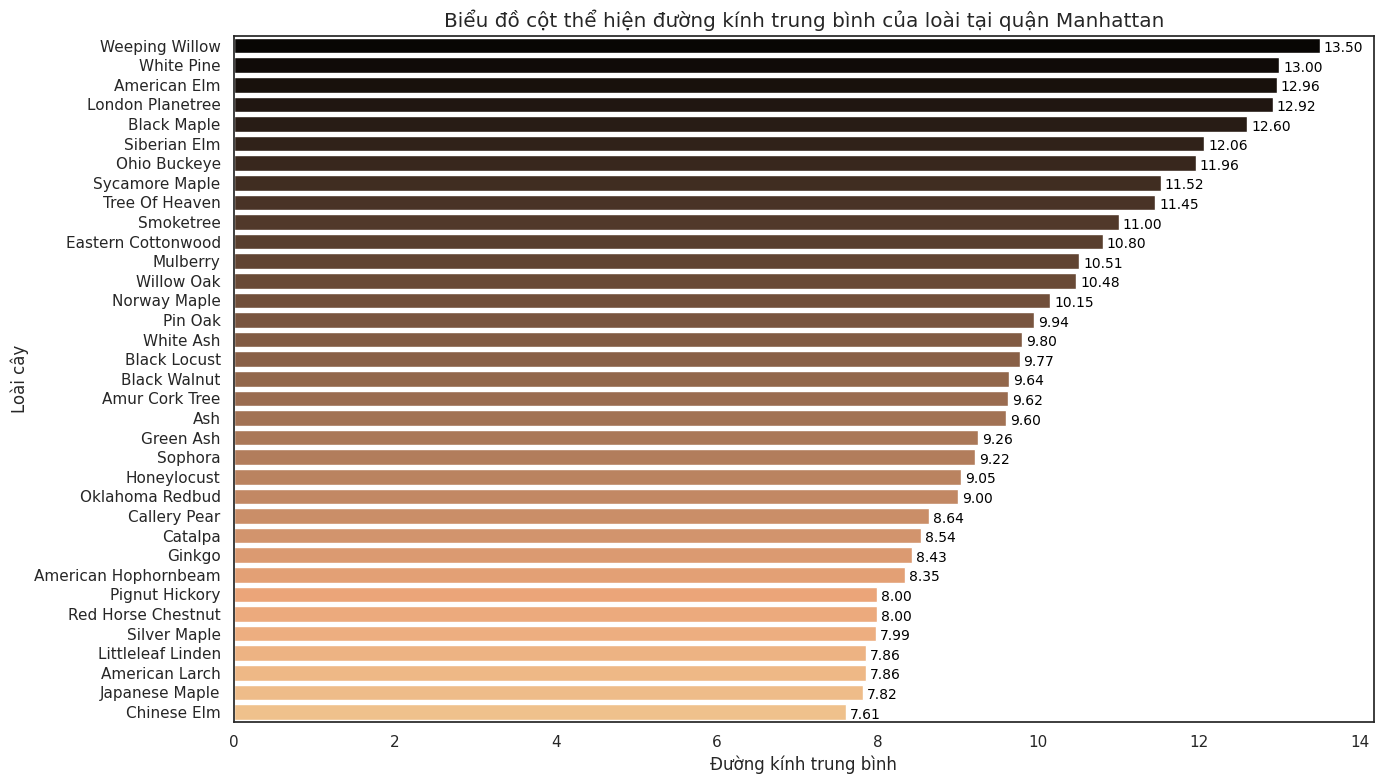

In [ ]:
#Biểu diễn trực quan đường kính trung bình của các loài cây trong quận Manhattan
plt.figure(figsize=(14,8))
plt.title('Biểu đồ cột thể hiện đường kính trung bình của loài tại quận Manhattan',fontsize='large')
ax = sns.barplot(x='Đường kính trung bình',y='Loài',data = M_treeinfo_df.sort_values(by='Đường kính trung bình',ascending=False).iloc[:35,:],palette = 'copper')
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',
                (p.get_width()+0.05, p.get_y() + p.get_height()/1.5),
                ha='left', va='center', fontsize=10, color='black')
plt.ylabel('Loài cây')
plt.tight_layout()
plt.show()

In [ ]:
# Độ phổ biến của các loài cây có đường kính trung bình lớn trong quận Manhattan
M_spc_arr = []
M_common_rank = []
M_mean_dbh = []
M_meandbh_rank = []
M_common_spc_arr = M_treeinfo_df['Loài'].values
M_large_dbh = M_treeinfo_df.sort_values(by='Đường kính trung bình', ascending=False).iloc[:35:]
M_large_dbh_dict = dict(zip(M_large_dbh['Loài'],M_large_dbh['Đường kính trung bình']))
for j in range(0,len(M_common_spc_arr)):
  for key,value in M_large_dbh_dict.items():
    if key == M_common_spc_arr[j]:
        M_spc_arr.append(key)
        M_common_rank.append(j+1)
        M_mean_dbh.append(value)
        M_meandbh_rank.append(list(M_large_dbh_dict.keys()).index(key)+1)

M_largecommon_tree = pd.DataFrame({'Loài':M_spc_arr,'Độ phổ biến':M_common_rank,'Đường kính trung bình':M_mean_dbh,'Xếp hạng đường kính trung bình':M_meandbh_rank})
M_largecommon_tree = M_largecommon_tree.sort_values(by=['Độ phổ biến','Xếp hạng đường kính trung bình'],ascending=[True,True])
html_text = "<p style='text-align: left center; color: #438c7c; font-size: 20px; font-weight: bold; font-family: Arial;'> Độ phổ biến của các cây có đường kính trung bình lớn trong quận Manhattan</p>"
display(HTML(html_text))
M_largecommon_tree

,Loài,Độ phổ biến,Đường kính trung bình,Xếp hạng đường kính trung bình
0,Honeylocust,1,9.045323,23
1,Callery Pear,2,8.636825,25
2,Ginkgo,3,8.434790,27
3,Pin Oak,4,9.944238,15
4,Sophora,5,9.219452,22
5,London Planetree,6,12.917647,4
6,Littleleaf Linden,8,7.857443,32
7,American Elm,10,12.964613,3
8,Willow Oak,13,10.475761,13
9,Chinese Elm,15,7.610191,35


# **IV. Machine Learning**

## **Load Cleaned Data**

In [ ]:
!gdown 1-iK32D3hDvSReGiZ2Rk6oYPY7eo8G6AD

Downloading...
From: https://drive.google.com/uc?id=1-iK32D3hDvSReGiZ2Rk6oYPY7eo8G6AD
To: /content/Cleaned_Tree.csv
100% 150M/150M [00:00<00:00, 159MB/s]


In [ ]:
df_cleaned = pd.read_csv(r'/content/Cleaned_Tree.csv', sep=',', encoding='utf-8', index_col = 0)
df_cleaned = df_cleaned.drop(columns=['modified_z_score'], errors='ignore')
df_cleaned

,tree_id,spc_common,tree_dbh,stump_diam,curb_loc,status,health,steward,sidewalk,problems,...,address,zip_city,borough,nta_name,latitude,longitude,postcode,community board,guards,cncldist
0,180683,red maple,3,0,OnCurb,Alive,Fair,None,NoDamage,None,...,108-005 70 AVENUE,Forest Hills,Queens,Forest Hills,40.723092,-73.844215,11375,406,None,29
1,200540,pin oak,21,0,OnCurb,Alive,Fair,None,Damage,Stones,...,147-074 7 AVENUE,Whitestone,Queens,Whitestone,40.794111,-73.818679,11357,407,None,19
2,204026,honeylocust,3,0,OnCurb,Alive,Good,1or2,Damage,None,...,390 MORGAN AVENUE,Brooklyn,Brooklyn,East Williamsburg,40.717581,-73.936608,11211,301,None,34
3,204337,honeylocust,10,0,OnCurb,Alive,Good,None,Damage,Stones,...,1027 GRAND STREET,Brooklyn,Brooklyn,East Williamsburg,40.713537,-73.934456,11211,301,None,34
4,189565,American linden,21,0,OnCurb,Alive,Good,None,Damage,Stones,...,603 6 STREET,Brooklyn,Brooklyn,Park Slope-Gowanus,40.666778,-73.975979,11215,306,None,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,pin oak,25,0,OnCurb,Alive,Good,None,Damage,None,...,32 MARCY AVENUE,Brooklyn,Brooklyn,North Side-South Side,40.713211,-73.954944,11211,301,None,34
683784,183795,Kentucky yellowwood,7,0,OnCurb,Alive,Good,1or2,NoDamage,None,...,67-035 SELFRIDGE STREET,Forest Hills,Queens,Forest Hills,40.715194,-73.856650,11375,406,None,29
683785,166161,red maple,12,0,OnCurb,Alive,Good,None,Damage,None,...,130 BIDWELL AVENUE,Staten Island,Staten Island,Westerleigh,40.620762,-74.136517,10314,501,None,50
683786,184028,red maple,9,0,OnCurb,Alive,Good,None,NoDamage,None,...,1985 ANTHONY AVENUE,Bronx,Bronx,Mount Hope,40.850828,-73.903115,10457,205,None,15


## **Data Preprocessing**

### **Encoding Categorical Variables**

In [ ]:
health_status = {'Good': 1, 'Fair': 2, 'Poor': 3}
health_status

{'Good': 1, 'Fair': 2, 'Poor': 3}

In [ ]:
df_cleaned['health_status'] = df_cleaned['health'].map(health_status)
df_cleaned

,tree_id,spc_common,tree_dbh,stump_diam,curb_loc,status,health,steward,sidewalk,problems,...,zip_city,borough,nta_name,latitude,longitude,postcode,community board,guards,cncldist,health_status
0,180683,red maple,3,0,OnCurb,Alive,Fair,None,NoDamage,None,...,Forest Hills,Queens,Forest Hills,40.723092,-73.844215,11375,406,None,29,2
1,200540,pin oak,21,0,OnCurb,Alive,Fair,None,Damage,Stones,...,Whitestone,Queens,Whitestone,40.794111,-73.818679,11357,407,None,19,2
2,204026,honeylocust,3,0,OnCurb,Alive,Good,1or2,Damage,None,...,Brooklyn,Brooklyn,East Williamsburg,40.717581,-73.936608,11211,301,None,34,1
3,204337,honeylocust,10,0,OnCurb,Alive,Good,None,Damage,Stones,...,Brooklyn,Brooklyn,East Williamsburg,40.713537,-73.934456,11211,301,None,34,1
4,189565,American linden,21,0,OnCurb,Alive,Good,None,Damage,Stones,...,Brooklyn,Brooklyn,Park Slope-Gowanus,40.666778,-73.975979,11215,306,None,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,pin oak,25,0,OnCurb,Alive,Good,None,Damage,None,...,Brooklyn,Brooklyn,North Side-South Side,40.713211,-73.954944,11211,301,None,34,1
683784,183795,Kentucky yellowwood,7,0,OnCurb,Alive,Good,1or2,NoDamage,None,...,Forest Hills,Queens,Forest Hills,40.715194,-73.856650,11375,406,None,29,1
683785,166161,red maple,12,0,OnCurb,Alive,Good,None,Damage,None,...,Staten Island,Staten Island,Westerleigh,40.620762,-74.136517,10314,501,None,50,1
683786,184028,red maple,9,0,OnCurb,Alive,Good,None,NoDamage,None,...,Bronx,Bronx,Mount Hope,40.850828,-73.903115,10457,205,None,15,1


In [ ]:
df_cleaned['health_status'].value_counts()

1    527142
2     96325
3     26781
Name: health_status, dtype: int64

In [ ]:
df_cleaned['curb_loc'] = df_cleaned['curb_loc'].map({'OnCurb': 1, 'OffsetFromCurb': 0})
df_cleaned['steward'] = df_cleaned['steward'].map({'1or2': 1, '3or4': 2, '4orMore': 3, 'None': 0})
df_cleaned['guards'] = df_cleaned['guards'].map({'Harmful': 2, 'Helpful': 3, 'Unsure': 1, 'None': 0})
df_cleaned['sidewalk'] = df_cleaned['sidewalk'].map({'Damage': 1, 'NoDamage': 0})
df_cleaned['root_stone'] = df_cleaned['root_stone'].map({'Yes': 1, 'No': 0})
df_cleaned['root_grate'] = df_cleaned['root_grate'].map({'Yes': 1, 'No': 0})
df_cleaned['root_other'] = df_cleaned['root_other'].map({'Yes': 1, 'No': 0})
df_cleaned['trunk_wire'] = df_cleaned['trunk_wire'].map({'Yes': 1, 'No': 0})
df_cleaned['trnk_light'] = df_cleaned['trnk_light'].map({'Yes': 1, 'No': 0})
df_cleaned['trnk_other'] = df_cleaned['trnk_other'].map({'Yes': 1, 'No': 0})
df_cleaned['brch_light'] = df_cleaned['brch_light'].map({'Yes': 1, 'No': 0})
df_cleaned['brch_shoe'] = df_cleaned['brch_shoe'].map({'Yes': 1, 'No': 0})
df_cleaned['brch_other'] = df_cleaned['brch_other'].map({'Yes': 1, 'No': 0})
df_cleaned.head()

,tree_id,spc_common,tree_dbh,stump_diam,curb_loc,status,health,steward,sidewalk,problems,...,zip_city,borough,nta_name,latitude,longitude,postcode,community board,guards,cncldist,health_status
0,180683,red maple,3,0,1,Alive,Fair,0,0,None,...,Forest Hills,Queens,Forest Hills,40.723092,-73.844215,11375,406,0,29,2
1,200540,pin oak,21,0,1,Alive,Fair,0,1,Stones,...,Whitestone,Queens,Whitestone,40.794111,-73.818679,11357,407,0,19,2
2,204026,honeylocust,3,0,1,Alive,Good,1,1,None,...,Brooklyn,Brooklyn,East Williamsburg,40.717581,-73.936608,11211,301,0,34,1
3,204337,honeylocust,10,0,1,Alive,Good,0,1,Stones,...,Brooklyn,Brooklyn,East Williamsburg,40.713537,-73.934456,11211,301,0,34,1
4,189565,American linden,21,0,1,Alive,Good,0,1,Stones,...,Brooklyn,Brooklyn,Park Slope-Gowanus,40.666778,-73.975979,11215,306,0,39,1


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650248 entries, 0 to 683787
Data columns (total 31 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tree_id          650248 non-null  int64  
 1   spc_common       650248 non-null  object 
 2   tree_dbh         650248 non-null  int64  
 3   stump_diam       650248 non-null  int64  
 4   curb_loc         650248 non-null  int64  
 5   status           650248 non-null  object 
 6   health           650248 non-null  object 
 7   steward          650248 non-null  int64  
 8   sidewalk         650248 non-null  int64  
 9   problems         650248 non-null  object 
 10  root_stone       650248 non-null  int64  
 11  root_grate       650248 non-null  int64  
 12  root_other       650248 non-null  int64  
 13  trunk_wire       650248 non-null  int64  
 14  trnk_light       650248 non-null  int64  
 15  trnk_other       650248 non-null  int64  
 16  brch_light       650248 non-null  int6

In [ ]:
# Encoding biến categorical
df_cleaned = pd.get_dummies(df_cleaned, columns=['spc_common', 'borough', 'user_type', 'borough'])
df_cleaned

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,steward,sidewalk,problems,root_stone,...,borough_Queens,borough_Staten Island,user_type_NYC Parks Staff,user_type_TreesCount Staff,user_type_Volunteer,borough_Bronx,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten Island
0,180683,3,0,1,Alive,Fair,0,0,None,0,...,1,0,0,1,0,0,0,0,1,0
1,200540,21,0,1,Alive,Fair,0,1,Stones,1,...,1,0,0,1,0,0,0,0,1,0
2,204026,3,0,1,Alive,Good,1,1,None,0,...,0,0,0,0,1,0,1,0,0,0
3,204337,10,0,1,Alive,Good,0,1,Stones,1,...,0,0,0,0,1,0,1,0,0,0
4,189565,21,0,1,Alive,Good,0,1,Stones,1,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,25,0,1,Alive,Good,0,1,None,0,...,0,0,0,0,1,0,1,0,0,0
683784,183795,7,0,1,Alive,Good,1,0,None,0,...,1,0,0,0,1,0,0,0,1,0
683785,166161,12,0,1,Alive,Good,0,1,None,0,...,0,1,0,0,1,0,0,0,0,1
683786,184028,9,0,1,Alive,Good,0,0,None,0,...,0,0,0,1,0,1,0,0,0,0


### **Train-Test Split**

In [ ]:
columns_exclude = ['tree_id', 'health', 'health_status', 'status', 'problems', 'nta_name', 'address', 'zip_city']
X = df_cleaned.drop(columns=columns_exclude, errors='ignore')
X

,tree_dbh,stump_diam,curb_loc,steward,sidewalk,root_stone,root_grate,root_other,trunk_wire,trnk_light,...,borough_Queens,borough_Staten Island,user_type_NYC Parks Staff,user_type_TreesCount Staff,user_type_Volunteer,borough_Bronx,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten Island
0,3,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,21,0,1,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,3,0,1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,10,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,21,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,25,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
683784,7,0,1,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
683785,12,0,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
683786,9,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [ ]:
y = df_cleaned['health_status']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 42)

### **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

### **Dimensionality Reduction - PCA**

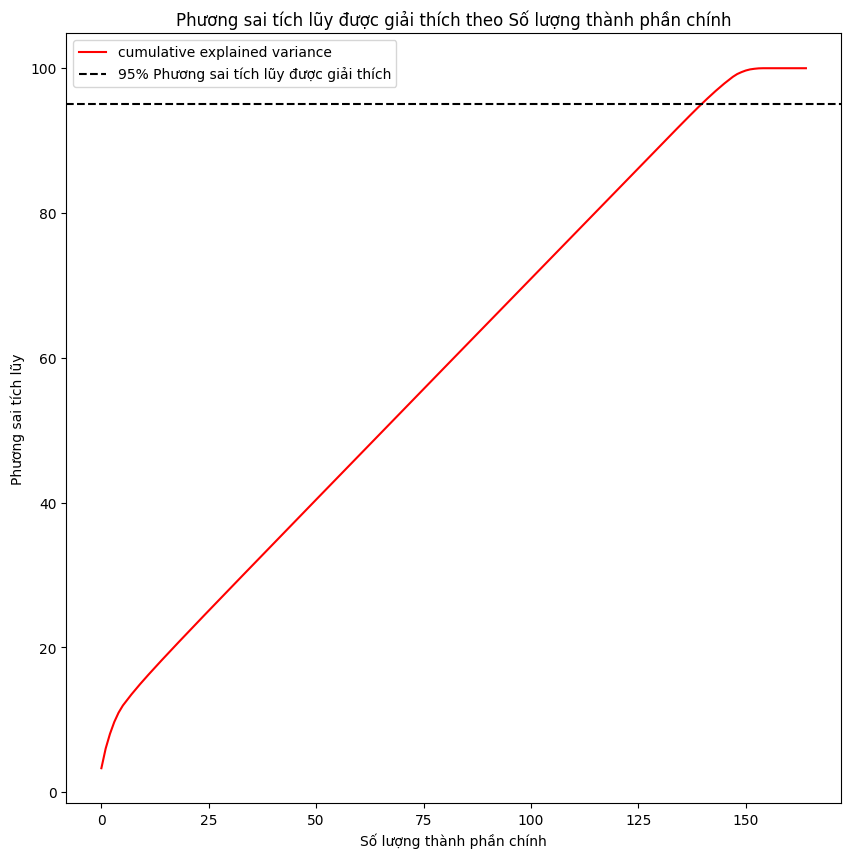

In [ ]:
#Using elbow-plot variance/dimensions
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_scaler)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Phương sai tích lũy được giải thích theo Số lượng thành phần chính')
plt.ylabel('Phương sai tích lũy')
plt.xlabel('Số lượng thành phần chính')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Phương sai tích lũy được giải thích')
plt.legend(loc='best')

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.95)
pca.fit(X_train_scaler)

X_train_pca = pd.DataFrame(pca.transform(X_train_scaler))
X_test_pca = pd.DataFrame(pca.transform(X_test_scaler))

In [ ]:
X_train_scaler.shape

(520198, 165)

In [ ]:
X_train_pca.shape

(520198, 141)

In [ ]:
X_test_scaler.shape

(130050, 165)

In [ ]:
X_test_pca.shape

(130050, 141)

## **Model Training, Metrics & Visualize**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,auc

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Huấn luyện mô hình
    model.fit(X_train, y_train)

    # Đánh giá trên tập huấn luyện và tập kiểm tra
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print("Accuracy (Train):", train_score)
    print("Accuracy (Test):", test_score)

    # Dự đoán và tính precision
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    print("Precision Score:", precision)

    # Tính Recall Score
    recall = recall_score(y_test, y_pred, average='weighted')
    print("Recall Score:", recall)

    # Tính F1-Score
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("F1 Score:", f1)

    # Tính ROC-AUC Score
    y_prob = model.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovo')
    print("ROC-AUC Score:", roc_auc)

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Visualize ROC-AUC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=model.classes_[1])
    auc_value = auc(fpr, tpr)
    plt.figure(figsize=(5,5), dpi=100)
    plt.plot(fpr, tpr, linestyle='-', label="(auc_value = %0.3f)" % auc_value)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Confusion matrix
    print("Confusion Matrix: ")
    plt.figure(figsize=(10, 5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g');
    plt.title('Confusion Matrix', fontsize=20)

### **Logistics Regression**

Accuracy (Train): 0.8106778572774213
Accuracy (Test): 0.8106805074971165
Precision Score: 0.6572028852357824
Recall Score: 0.8106805074971165
F1 Score: 0.7259181092574157
ROC-AUC Score: 0.5649878315606822

Classification Report:
              precision    recall  f1-score   support

           1       0.81      1.00      0.90    105429
           2       0.00      0.00      0.00     19265
           3       0.00      0.00      0.00      5356

    accuracy                           0.81    130050
   macro avg       0.27      0.33      0.30    130050
weighted avg       0.66      0.81      0.73    130050



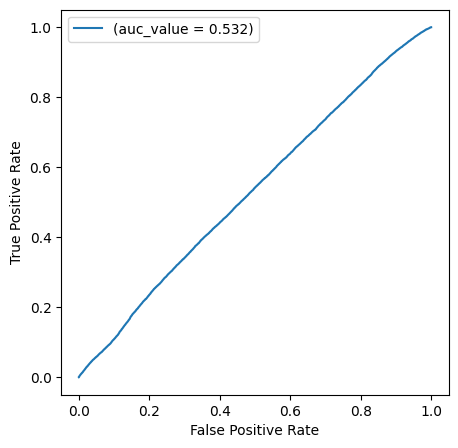

Confusion Matrix: 


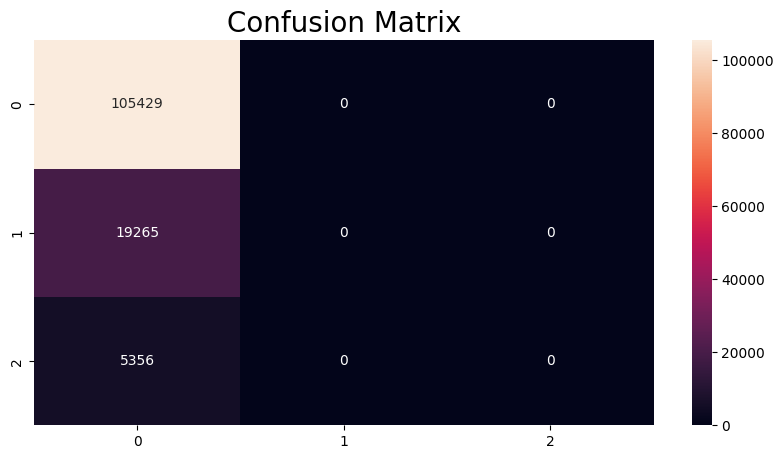

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42)
evaluate_model(lr, X_train_pca, y_train, X_test_pca, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
logistic_regression = LogisticRegression(n_jobs = -1)

parameters = { 'C' : [1.1,1.25,1.5]}

grid_search = GridSearchCV(estimator = logistic_regression, param_grid = parameters , scoring = 'accuracy', cv = 3, n_jobs = -1 , verbose = 2)
grid_scores = grid_search.fit(X_train_pca , y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


In [ ]:
print( grid_search.best_score_)
print(grid_search.best_params_)

0.81085086852876
{'C': 1.1}


Accuracy (Train): 0.810870091772748
Accuracy (Test): 0.8104882737408688
Precision Score: 0.7317590799718288
Recall Score: 0.8104882737408688
F1 Score: 0.7303804313873499
ROC-AUC Score: 0.6446095742369933

Classification Report:
              precision    recall  f1-score   support

           1       0.81      1.00      0.90    105429
           2       0.34      0.01      0.02     19265
           3       0.54      0.01      0.02      5356

    accuracy                           0.81    130050
   macro avg       0.56      0.34      0.31    130050
weighted avg       0.73      0.81      0.73    130050



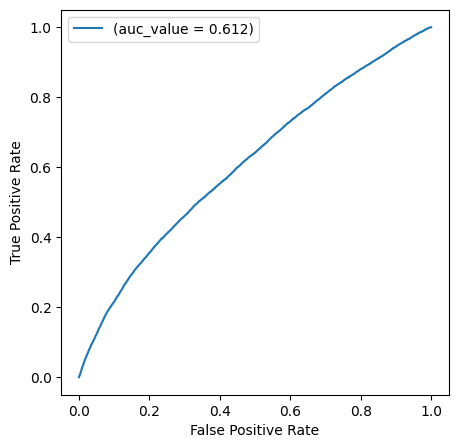

Confusion Matrix: 


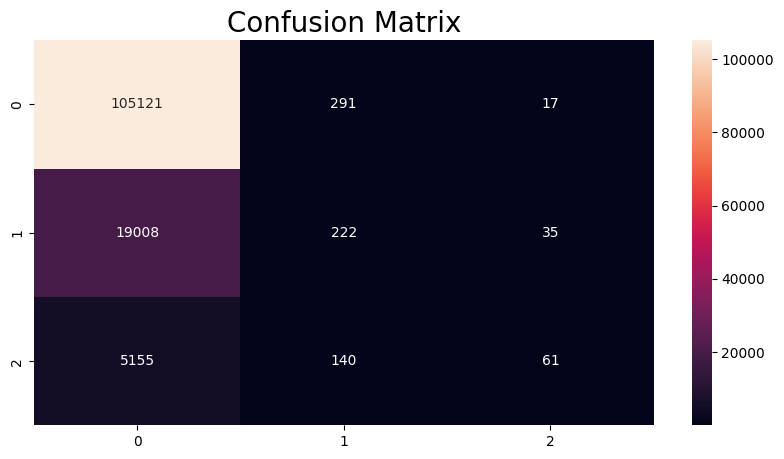

In [ ]:
lr = LogisticRegression(C = 1.1, n_jobs = -1)
evaluate_model(lr, X_train_pca, y_train, X_test_pca, y_test)

### **Decision Tree**

Accuracy (Train): 0.9999846212403739
Accuracy (Test): 0.7635832372164552
Precision Score: 0.7646326032650261
Recall Score: 0.7635832372164552
F1 Score: 0.7640997665766851
ROC-AUC Score: 0.631184713916143

Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.87      0.87    105429
           2       0.34      0.35      0.34     19265
           3       0.24      0.23      0.23      5356

    accuracy                           0.76    130050
   macro avg       0.48      0.48      0.48    130050
weighted avg       0.76      0.76      0.76    130050



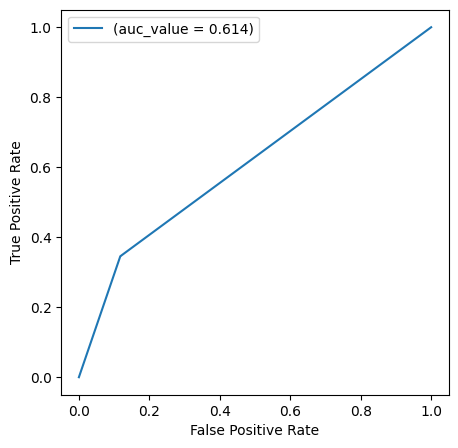

Confusion Matrix: 


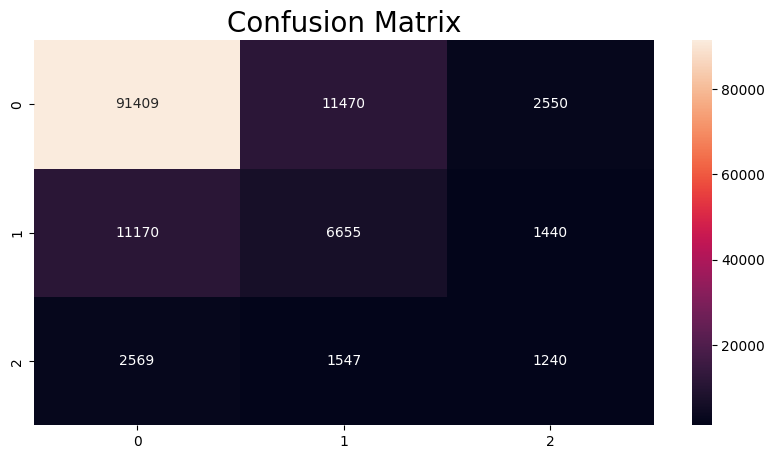

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_1 = DecisionTreeClassifier(random_state = 42)
evaluate_model(dt_1, X_train_pca, y_train, X_test_pca, y_test)

Accuracy (Train): 0.8123829772509699
Accuracy (Test): 0.8123106497500961
Precision Score: 0.7472041010433877
Recall Score: 0.8123106497500961
F1 Score: 0.7342630621586128
ROC-AUC Score: 0.6139880099307037

Classification Report:
              precision    recall  f1-score   support

           1       0.82      1.00      0.90    105429
           2       0.46      0.01      0.03     19265
           3       0.45      0.04      0.07      5356

    accuracy                           0.81    130050
   macro avg       0.57      0.35      0.33    130050
weighted avg       0.75      0.81      0.73    130050



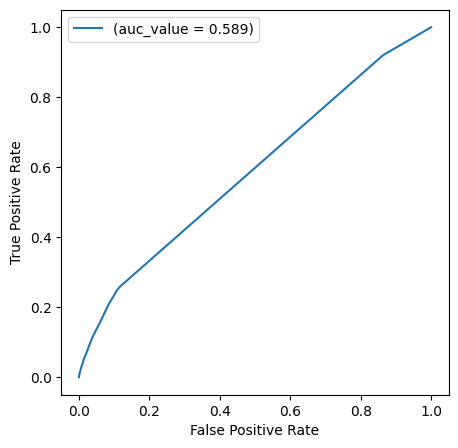

Confusion Matrix: 


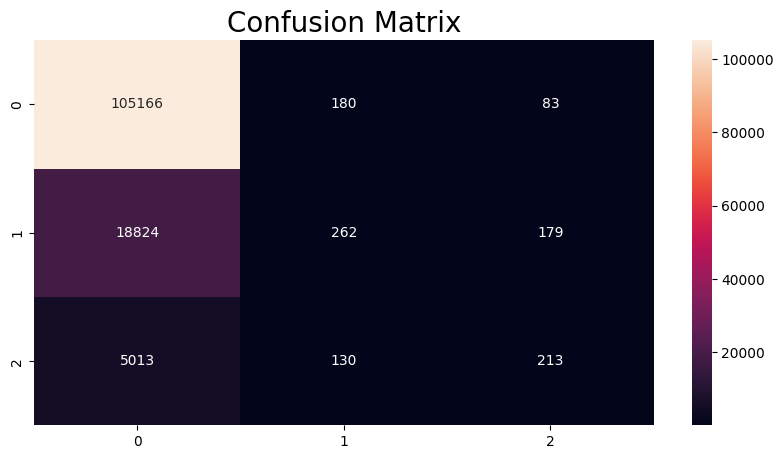

In [ ]:
# Hiệu chỉnh tham số
dt_2 = DecisionTreeClassifier(max_depth = 5,
                            min_samples_split = 10,
                            min_samples_leaf = 3,
                            random_state = 42)
evaluate_model(dt_2, X_train_pca, y_train, X_test_pca, y_test)

### **Random Forest**

Accuracy (Train): 0.9999192615119628
Accuracy (Test): 0.8232141484044598
Precision Score: 0.7862061019896512
F1 Score: 0.7928470730516396
ROC-AUC Score: 0.7870497932538906

Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.96      0.91    105429
           2       0.51      0.24      0.33     19265
           3       0.45      0.18      0.25      5356

    accuracy                           0.82    130050
   macro avg       0.60      0.46      0.50    130050
weighted avg       0.79      0.82      0.79    130050



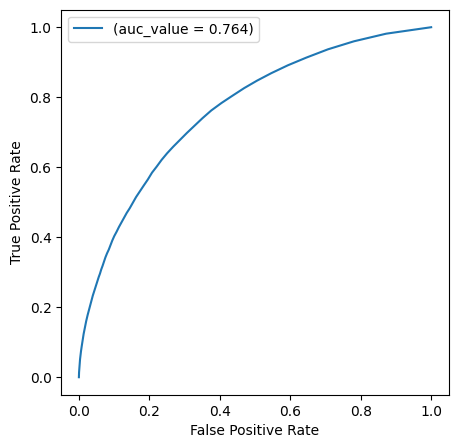

Confusion Matrix: 


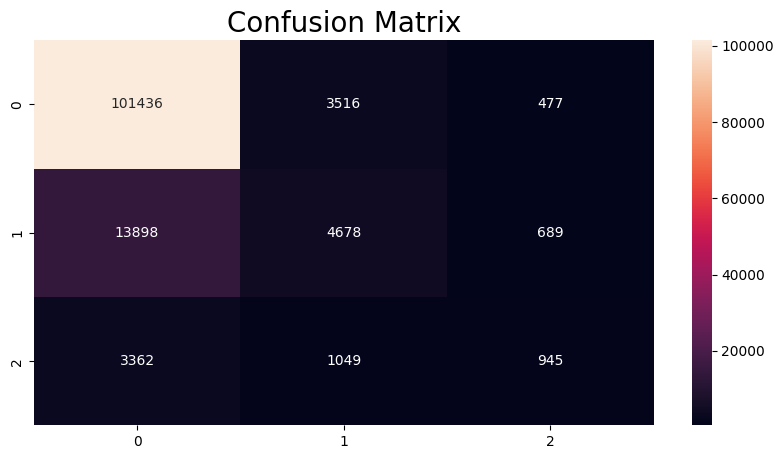

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_1 = RandomForestClassifier(random_state = 42)
evaluate_model(rfc_1, X_train_pca, y_train, X_test_pca, y_test)

Accuracy (Train): 0.8106778572774213
Accuracy (Test): 0.8106805074971165
Precision Score: 0.6572028852357824
F1 Score: 0.7259181092574157
ROC-AUC Score: 0.6702043096470847

Classification Report:
              precision    recall  f1-score   support

           1       0.81      1.00      0.90    105429
           2       0.00      0.00      0.00     19265
           3       0.00      0.00      0.00      5356

    accuracy                           0.81    130050
   macro avg       0.27      0.33      0.30    130050
weighted avg       0.66      0.81      0.73    130050



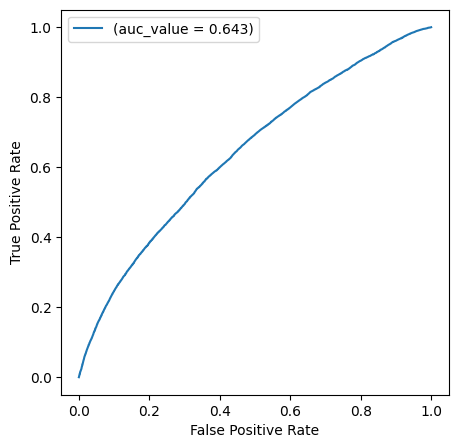

Confusion Matrix: 


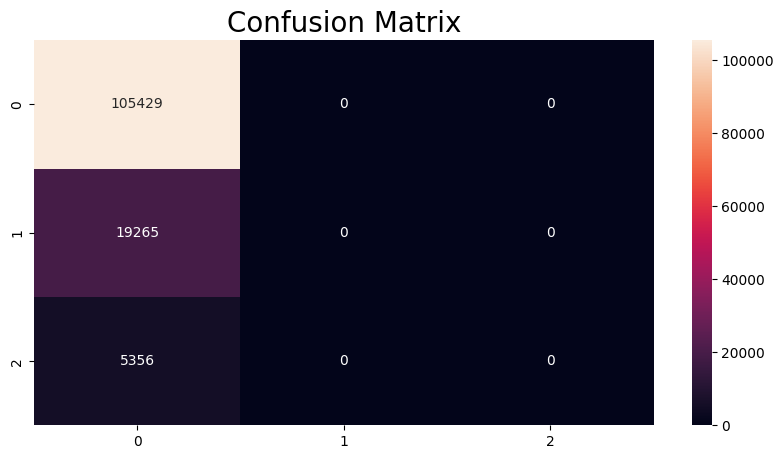

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_2 = RandomForestClassifier(n_estimators = 100,
                               max_depth = 6,
                               random_state = 42)
evaluate_model(rfc_2, X_train_pca, y_train, X_test_pca, y_test)